목적 : 비상장 외감기업 탐색적 데이터 분석 EDA
=====================
목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
-------------------------    

import modules

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations
from sklearn.model_selection import train_test_split

환경설정

In [3]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [4]:
unlisted = pd.read_csv("../data/datasets/비상장후보피처.csv")
# 영업년수와 상장년수가 있더라

In [5]:
unlisted.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '매출액영업이익률',
       '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액증가율',
       '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율',
       '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률', '총자본회전률',
       '비유동자산회전률', '유동자산회전률', '영업년수', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

# train test split

In [6]:
X = unlisted.drop('부실판단', axis=1)
y = unlisted['부실판단']
# 데이터를 학습용과 테스트용으로 나눔
unlisted_X_train, unlisted_X_test, unlisted_y_train, unlisted_y_test = train_test_split(X, y, test_size= 1 / (np.exp(1) + 1) , random_state=911, stratify=y)

In [7]:
unlisted_X_train['부실판단'] = unlisted_y_train

In [8]:
len(X)

20707

In [9]:
len(unlisted_X_train)

15138

In [10]:
len(unlisted_X_test)

5569

# describe

all

In [11]:
unlisted_X_train

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
7716,(주)동남코리아,70118,2022,-18.740,-39.580,-3.410,-27.330,26.090,17.940,22.200,...,0.310,0.130,0.140,3.590,30.000,1,0,0,0,0.000
4739,피에스케이홀딩스(주),20666,2019,130.010,22131.400,10.600,36.690,1385.060,1230.540,8.880,...,0.970,0.300,0.400,1.200,38.000,0,1,0,0,0.000
12685,금용해양산업주식회사,63939,2022,121.510,368.960,29.460,46.110,159.900,159.900,32.010,...,0.700,0.700,1.010,2.230,14.000,0,1,0,0,0.000
17405,주식회사대일,53349,2014,-2.390,-3.210,-1.850,-2.010,87.410,23.480,341.770,...,0.960,0.940,2.000,1.760,22.000,1,0,0,0,1.000
18617,주식회사삼호프레스,83444,2018,-1.480,-2.030,-0.910,-2.540,71.900,59.910,160.760,...,0.500,0.350,0.420,2.250,22.000,0,0,0,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,농업회사법인한만두식품주식회사,82850,2022,6.720,8.850,5.280,5.950,95.860,63.560,367.770,...,0.920,0.920,1.510,2.320,13.000,0,0,1,0,0.000
12657,금성냉장주식회사,29681,2014,-0.530,-1.020,-0.440,-0.520,28.600,13.240,484.900,...,0.860,0.830,1.040,4.200,24.000,0,1,0,0,1.000
11925,(주)노비아레텍,70975,2022,-7.670,-11.400,-5.630,-4.340,100.960,38.140,276.910,...,1.360,1.360,4.550,1.940,12.000,1,0,0,0,1.000
10995,새한에프앤비(주),13761,2014,-9.190,-10.580,-6.360,-17.210,45.060,45.060,224.730,...,0.710,0.360,0.480,1.370,31.000,0,0,0,1,1.000


In [12]:
unlisted_X_train.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,...,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,67773.011,2019.874,19.314,724.234,3.241,-22.741,431.245,358.475,1378.936,983.416,...,1.119,0.996,22.988,2.830,21.322,0.218,0.368,0.191,0.223,0.361
std,23619.347,2.797,1261.272,31970.320,37.792,539.239,5347.663,5224.565,35986.322,30885.126,...,1.590,1.404,375.217,5.156,11.151,0.413,0.482,0.393,0.416,0.480
min,10037.000,2014.000,-86467.650,-323703.660,-3388.620,-21110.050,0.070,0.070,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,52329.000,2018.000,-4.480,-5.120,-2.880,-4.890,56.050,31.620,60.845,36.860,...,0.340,0.280,0.490,1.060,13.000,0.000,0.000,0.000,0.000,0.000
50%,70853.000,2022.000,2.920,1.510,1.860,2.360,108.715,72.700,163.855,102.565,...,0.820,0.730,1.460,1.990,20.000,0.000,0.000,0.000,0.000,0.000
75%,87046.750,2022.000,14.328,17.380,7.387,10.777,197.823,150.323,373.438,239.108,...,1.430,1.300,3.757,3.340,27.000,0.000,1.000,0.000,0.000,1.000
max,101635.000,2022.000,113999.840,3194164.340,1274.750,21579.540,447760.110,447760.110,3385006.150,2905990.690,...,106.800,92.050,32610.280,344.060,110.000,1.000,1.000,1.000,1.000,1.000


In [13]:
unlisted_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15138 entries, 7716 to 12115
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                15138 non-null  object 
 1   거래소코드              15138 non-null  int64  
 2   회계년도               15138 non-null  int64  
 3   CASH FLOW 대 부채비율   15138 non-null  float64
 4   CASH FLOW 대 차입금비율  15138 non-null  float64
 5   CASH FLOW 대 총자본비율  15138 non-null  float64
 6   CASH FLOW 대 매출액비율  15138 non-null  float64
 7   유동비율               15138 non-null  float64
 8   당좌비율               15138 non-null  float64
 9   부채비율               15138 non-null  float64
 10  유동부채비율             15138 non-null  float64
 11  차입금의존도             15138 non-null  float64
 12  순운전자본비율            15138 non-null  float64
 13  현금비율               15138 non-null  float64
 14  유동자산구성비율           15138 non-null  float64
 15  자기자본구성비율           15138 non-null  float64
 16  자기자본순이익률           15138

In [14]:
unlisted_X_train.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '매출액영업이익률',
       '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액증가율',
       '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율',
       '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률', '총자본회전률',
       '비유동자산회전률', '유동자산회전률', '영업년수', '도입기', '성숙기', '성장기', '쇠퇴기', '부실판단'],
      dtype='object')

In [15]:
unlisted_X_train.isna().sum().sort_values(ascending=False)

회사명                  0
매출채권회전률              0
비유동자산증가율             0
매출액증가율               0
유형자산증가율              0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
당좌자산회전률              0
거래소코드                0
유형자산회전율              0
경영자본회전률              0
총자본회전률               0
비유동자산회전률             0
유동자산회전률              0
영업년수                 0
도입기                  0
성숙기                  0
성장기                  0
쇠퇴기                  0
유동자산증가율              0
총자본증가율               0
총자산증가율               0
CROE                 0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
현금비율                 0
유동자산구성비율             0
자기자본구성비율             0
자기자본순이익률             0
경영자본순이익률   

In [23]:
unlisted_X_train.drop(['부실판단', '도입기', '성장기', '성숙기', '쇠퇴기'], axis=1).isin([0]).sum().sort_values(ascending=False) / len(unlisted_X_train) * 100

CROE                12.287
자본분배율               10.556
이윤분배율                9.169
총자산회전율               8.944
총자산증가율               8.938
차입금의존도               8.409
CASH FLOW 대 차입금비율    8.376
매출채권회전률              7.802
자기자본순이익률             4.987
자기자본구성비율             3.970
부채비율                 3.957
유동부채비율               3.957
유형자산증가율              2.299
설비투자효율               1.427
유형자산회전율              1.249
매출액증가율               0.958
현금비율                 0.595
금융비용부담률              0.548
총자본회전률               0.357
비유동자산증가율             0.304
경영자본회전률              0.244
비유동자산회전률             0.185
영업년수                 0.106
유동자산회전률              0.092
총자본사업이익률             0.059
CASH FLOW 대 총자본비율    0.053
매출액영업이익률             0.053
총자본증가율               0.053
CASH FLOW 대 매출액비율    0.053
총자본영업이익률             0.053
경영자본순이익률             0.046
CASH FLOW 대 부채비율     0.033
총자본투자효율              0.026
매출액순이익률              0.026
유동자산증가율              0.026
부가가치율                0.013
당좌자산회전률              0.013
부

In [340]:
inf_col = unlisted_X_train.isin([np.inf]).sum().sort_values(ascending=False).index[0]
max_value = unlisted_X_train[inf_col].replace(np.inf, np.nan).max()
unlisted_X_train[inf_col] = unlisted_X_train[inf_col].replace(np.inf, max_value)

# 범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [341]:
# 비상장 all data는 unlisted
# 비상장 label들

labels = unlisted_X_train[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 비상장 피처
features = unlisted_X_train.drop(
    labels=[
        '회사명',
        '거래소코드',
        '회계년도',        
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'        
    ],
    axis=1,    
)

# 1현금흐름 4개
cash_ft1 = unlisted_X_train[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 2안정성 9개
stability_ft1 = unlisted_X_train[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 3수익성 8개
profitability_ft1 = unlisted_X_train[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본영업이익률',
        '매출액영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 4성장성 6개
growth_ft1 = unlisted_X_train[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 5생산성 6개
productivity_ft1 = unlisted_X_train[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 6활동성 8개
activity_ft1 = unlisted_X_train[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 7기타
etc_ft1 = unlisted_X_train[
    [
        '영업년수', 
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

1현금흐름 4가지 cash

In [342]:
cash_ft1.describe()

,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000
mean,19.314,724.234,3.241,-22.741,0.361
std,1261.272,31970.320,37.792,539.239,0.480
min,-86467.650,-323703.660,-3388.620,-21110.050,0.000
25%,-4.480,-5.120,-2.880,-4.890,0.000
50%,2.920,1.510,1.860,2.360,0.000
75%,14.328,17.380,7.387,10.777,1.000
max,113999.840,3194164.340,1274.750,21579.540,1.000


2안정성 9가지 stability

In [343]:
stability_ft1.describe()

,유동비율,당좌비율,부채비율,유동부채비율,차입금의존도,순운전자본비율,현금비율,유동자산구성비율,자기자본구성비율,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,431.245,358.475,1378.936,983.416,43.176,0.167,98.637,45.603,38.894,0.361
std,5347.663,5224.565,35986.322,30885.126,211.937,297.974,2442.606,28.781,26.118,0.480
min,0.070,0.070,0.000,0.000,0.000,-36261.200,-0.200,0.000,0.000,0.000
25%,56.050,31.620,60.845,36.860,17.360,-19.517,1.590,21.870,18.270,0.000
50%,108.715,72.700,163.855,102.565,42.040,2.925,8.605,43.180,35.145,0.000
75%,197.823,150.323,373.438,239.108,61.450,26.938,32.528,67.630,57.267,1.000
max,447760.110,447760.110,3385006.150,2905990.690,25856.360,99.690,275285.960,100.000,99.980,1.000


3수익성 8가지 profitability

In [344]:
productivity_ft1.describe()

,부가가치(백만원),총자본투자효율,설비투자효율,부가가치율,이윤분배율,자본분배율,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,6674.974,30.528,538176.590,46.170,-95.676,8.411,0.361
std,352176.022,1669.910,34787344.705,747.415,2660.033,1074.584,0.480
min,-68167.780,-246.020,-563419210.000,-13763.270,-208392.960,-94627.640,0.000
25%,937.122,4.870,9.130,7.960,-0.310,22.102,0.000
50%,2281.575,11.060,28.820,16.220,11.390,55.870,0.000
75%,4883.170,19.218,97.688,33.188,35.943,74.770,1.000
max,43327598.520,205392.780,4053778655.000,70947.820,8226.360,126.190,1.000


4성장성 6개 growth

In [345]:
growth_ft1.describe()

,총자산증가율,총자본증가율,유동자산증가율,비유동자산증가율,매출액증가율,유형자산증가율,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,6.218,6.597,216.233,302.142,228.063,192381.296,0.361
std,67.287,55.243,20598.824,11247.279,9908.536,21029765.042,0.480
min,-100.000,-99.890,-99.900,-100.000,-99.910,-100.000,0.000
25%,-4.447,-5.480,-14.060,-5.207,-12.510,-5.630,0.000
50%,0.523,1.820,3.990,-0.110,3.610,-1.040,0.000
75%,11.191,12.805,25.038,12.480,21.797,8.002,1.000
max,5081.217,5081.220,2531488.340,1154781.210,900275.000,2580453089.000,1.000


5생산성 6가지 productivity

In [346]:
productivity_ft1.describe()

,부가가치(백만원),총자본투자효율,설비투자효율,부가가치율,이윤분배율,자본분배율,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,6674.974,30.528,538176.590,46.170,-95.676,8.411,0.361
std,352176.022,1669.910,34787344.705,747.415,2660.033,1074.584,0.480
min,-68167.780,-246.020,-563419210.000,-13763.270,-208392.960,-94627.640,0.000
25%,937.122,4.870,9.130,7.960,-0.310,22.102,0.000
50%,2281.575,11.060,28.820,16.220,11.390,55.870,0.000
75%,4883.170,19.218,97.688,33.188,35.943,74.770,1.000
max,43327598.520,205392.780,4053778655.000,70947.820,8226.360,126.190,1.000


6활동성 8가지 activity

In [347]:
activity_ft1.describe()

,총자산회전율,매출채권회전률,당좌자산회전률,유형자산회전율,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,0.938,700.636,4.246,7686.666,1.119,0.996,22.988,2.830,0.361
std,1.663,46090.572,7.518,263256.703,1.590,1.404,375.217,5.156,0.480
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.162,3.990,1.460,0.650,0.340,0.280,0.490,1.060,0.000
50%,0.652,7.150,2.880,2.060,0.820,0.730,1.460,1.990,0.000
75%,1.231,13.370,4.940,7.050,1.430,1.300,3.757,3.340,1.000
max,100.540,5386048.240,344.060,19823298.290,106.800,92.050,32610.280,344.060,1.000


7기타 etc

In [348]:
etc_ft1.describe()

,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
count,15138.000,15138.000,15138.000,15138.000,15138.000,15138.000
mean,21.322,0.218,0.368,0.191,0.223,0.361
std,11.151,0.413,0.482,0.393,0.416,0.480
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,13.000,0.000,0.000,0.000,0.000,0.000
50%,20.000,0.000,0.000,0.000,0.000,0.000
75%,27.000,0.000,1.000,0.000,0.000,1.000
max,110.000,1.000,1.000,1.000,1.000,1.000


# 상관분석과 유의성 검정

In [349]:
# 상관 계수와 p-value 계산하는 함수
def correlation_and_pval(df):
    columns = df.columns
    corr_dict = {}
    pval_dict = {}
    
    # 모든 특성 쌍에 대한 상관 계수와 p-value 계산
    for col1, col2 in combinations(columns, 2):
        corr, pval = pearsonr(df[col1], df[col2])
        corr_dict[f"{col1}-{col2}"] = corr
        pval_dict[f"{col1}-{col2}"] = pval
    
    return corr_dict, pval_dict

1현금흐름

<Axes: >

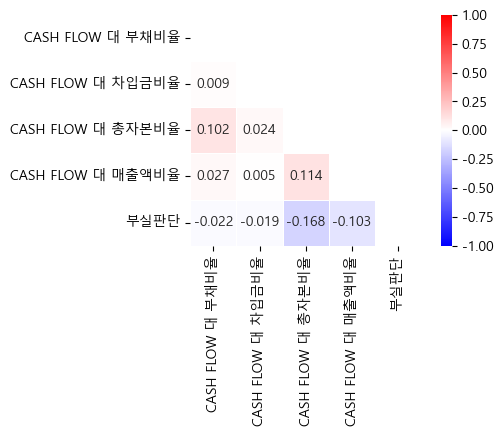

In [350]:
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(cash_ft1.corr(), dtype=bool))
sns.heatmap(cash_ft1.corr(),
            vmax=1,
            vmin=-1,
            # center=0,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask) # 좌하방만 표시

In [351]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(cash_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.009
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.102
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.027
CASH FLOW 대 부채비율-부실판단: -0.022
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.024
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.005
CASH FLOW 대 차입금비율-부실판단: -0.019
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.114
CASH FLOW 대 총자본비율-부실판단: -0.168
CASH FLOW 대 매출액비율-부실판단: -0.103
p-value======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.270
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.000
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.001
CASH FLOW 대 부채비율-부실판단: 0.007
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.004
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.511
CASH FLOW 대 차입금비율-부실판단: 0.021
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 총자본비율-부실판단: 0.000
CASH FLOW 대 매출액비율-부실판단: 0.000


In [352]:
np.abs(cash_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단                1.000
CASH FLOW 대 총자본비율   0.168
CASH FLOW 대 매출액비율   0.103
CASH FLOW 대 부채비율    0.022
CASH FLOW 대 차입금비율   0.019
Name: 부실판단, dtype: float64

2안정성

<Axes: >

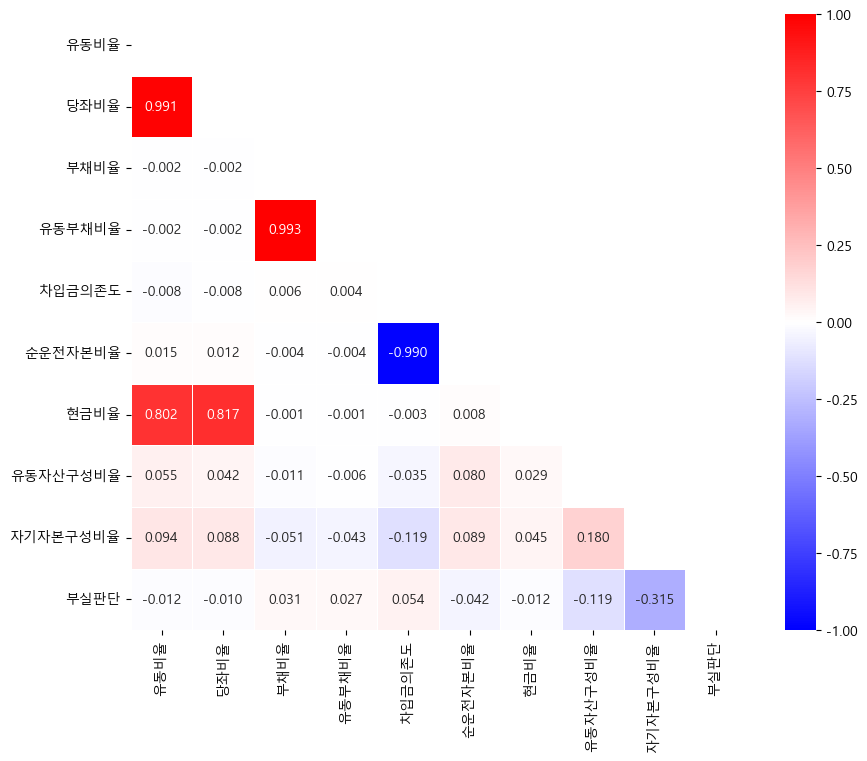

In [353]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [354]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(stability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
유동비율-당좌비율: 0.991
유동비율-부채비율: -0.002
유동비율-유동부채비율: -0.002
유동비율-차입금의존도: -0.008
유동비율-순운전자본비율: 0.015
유동비율-현금비율: 0.802
유동비율-유동자산구성비율: 0.055
유동비율-자기자본구성비율: 0.094
유동비율-부실판단: -0.012
당좌비율-부채비율: -0.002
당좌비율-유동부채비율: -0.002
당좌비율-차입금의존도: -0.008
당좌비율-순운전자본비율: 0.012
당좌비율-현금비율: 0.817
당좌비율-유동자산구성비율: 0.042
당좌비율-자기자본구성비율: 0.088
당좌비율-부실판단: -0.010
부채비율-유동부채비율: 0.993
부채비율-차입금의존도: 0.006
부채비율-순운전자본비율: -0.004
부채비율-현금비율: -0.001
부채비율-유동자산구성비율: -0.011
부채비율-자기자본구성비율: -0.051
부채비율-부실판단: 0.031
유동부채비율-차입금의존도: 0.004
유동부채비율-순운전자본비율: -0.004
유동부채비율-현금비율: -0.001
유동부채비율-유동자산구성비율: -0.006
유동부채비율-자기자본구성비율: -0.043
유동부채비율-부실판단: 0.027
차입금의존도-순운전자본비율: -0.990
차입금의존도-현금비율: -0.003
차입금의존도-유동자산구성비율: -0.035
차입금의존도-자기자본구성비율: -0.119
차입금의존도-부실판단: 0.054
순운전자본비율-현금비율: 0.008
순운전자본비율-유동자산구성비율: 0.080
순운전자본비율-자기자본구성비율: 0.089
순운전자본비율-부실판단: -0.042
현금비율-유동자산구성비율: 0.029
현금비율-자기자본구성비율: 0.045
현금비율-부실판단: -0.012
유동자산구성비율-자기자본구성비율: 0.180
유동자산구성비율-부실판단: -0.119
자기자본구성비율-부실판단: -0.315
p-value======================
유동비율-당좌비율: 0.000
유

In [355]:
np.abs(stability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
자기자본구성비율   0.315
유동자산구성비율   0.119
차입금의존도     0.054
순운전자본비율    0.042
부채비율       0.031
유동부채비율     0.027
현금비율       0.012
유동비율       0.012
당좌비율       0.010
Name: 부실판단, dtype: float64

3수익성

<Axes: >

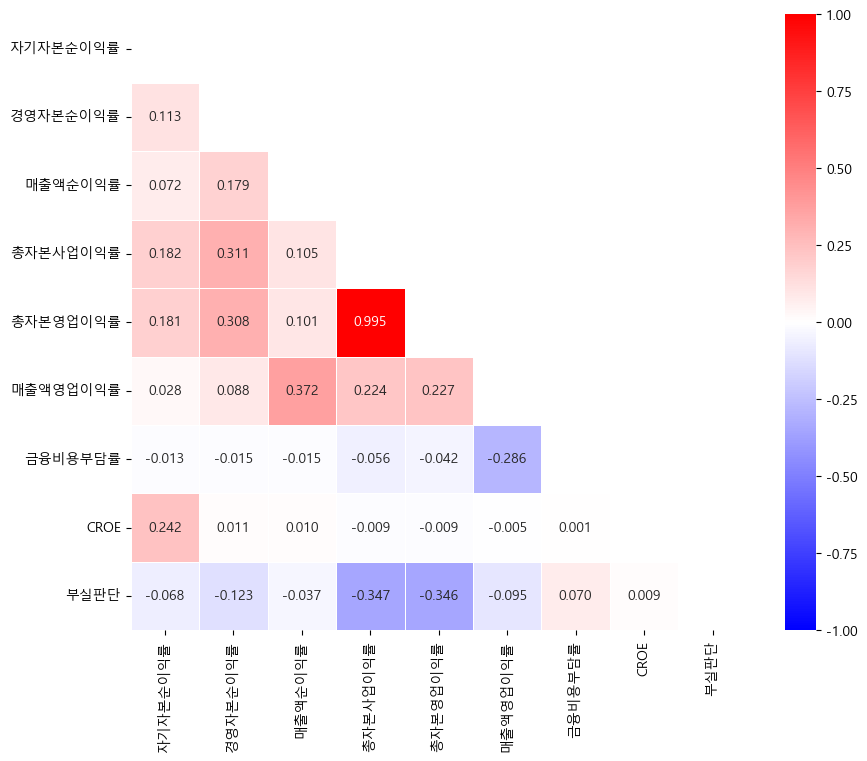

In [356]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(profitability_ft1.corr(), dtype=bool))
sns.heatmap(profitability_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [357]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(profitability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
자기자본순이익률-경영자본순이익률: 0.113
자기자본순이익률-매출액순이익률: 0.072
자기자본순이익률-총자본사업이익률: 0.182
자기자본순이익률-총자본영업이익률: 0.181
자기자본순이익률-매출액영업이익률: 0.028
자기자본순이익률-금융비용부담률: -0.013
자기자본순이익률-CROE: 0.242
자기자본순이익률-부실판단: -0.068
경영자본순이익률-매출액순이익률: 0.179
경영자본순이익률-총자본사업이익률: 0.311
경영자본순이익률-총자본영업이익률: 0.308
경영자본순이익률-매출액영업이익률: 0.088
경영자본순이익률-금융비용부담률: -0.015
경영자본순이익률-CROE: 0.011
경영자본순이익률-부실판단: -0.123
매출액순이익률-총자본사업이익률: 0.105
매출액순이익률-총자본영업이익률: 0.101
매출액순이익률-매출액영업이익률: 0.372
매출액순이익률-금융비용부담률: -0.015
매출액순이익률-CROE: 0.010
매출액순이익률-부실판단: -0.037
총자본사업이익률-총자본영업이익률: 0.995
총자본사업이익률-매출액영업이익률: 0.224
총자본사업이익률-금융비용부담률: -0.056
총자본사업이익률-CROE: -0.009
총자본사업이익률-부실판단: -0.347
총자본영업이익률-매출액영업이익률: 0.227
총자본영업이익률-금융비용부담률: -0.042
총자본영업이익률-CROE: -0.009
총자본영업이익률-부실판단: -0.346
매출액영업이익률-금융비용부담률: -0.286
매출액영업이익률-CROE: -0.005
매출액영업이익률-부실판단: -0.095
금융비용부담률-CROE: 0.001
금융비용부담률-부실판단: 0.070
CROE-부실판단: 0.009
p-value======================
자기자본순이익률-경영자본순이익률: 0.000
자기자본순이익률-매출액순이익률: 0.000
자기자본순이익률-총자본사업이익률: 0.000
자기자본순이익률-총자본영업이익률: 0.000
자기자본순이익률

In [358]:
np.abs(profitability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
총자본사업이익률   0.347
총자본영업이익률   0.346
경영자본순이익률   0.123
매출액영업이익률   0.095
금융비용부담률    0.070
자기자본순이익률   0.068
매출액순이익률    0.037
CROE       0.009
Name: 부실판단, dtype: float64

4성장성

<Axes: >

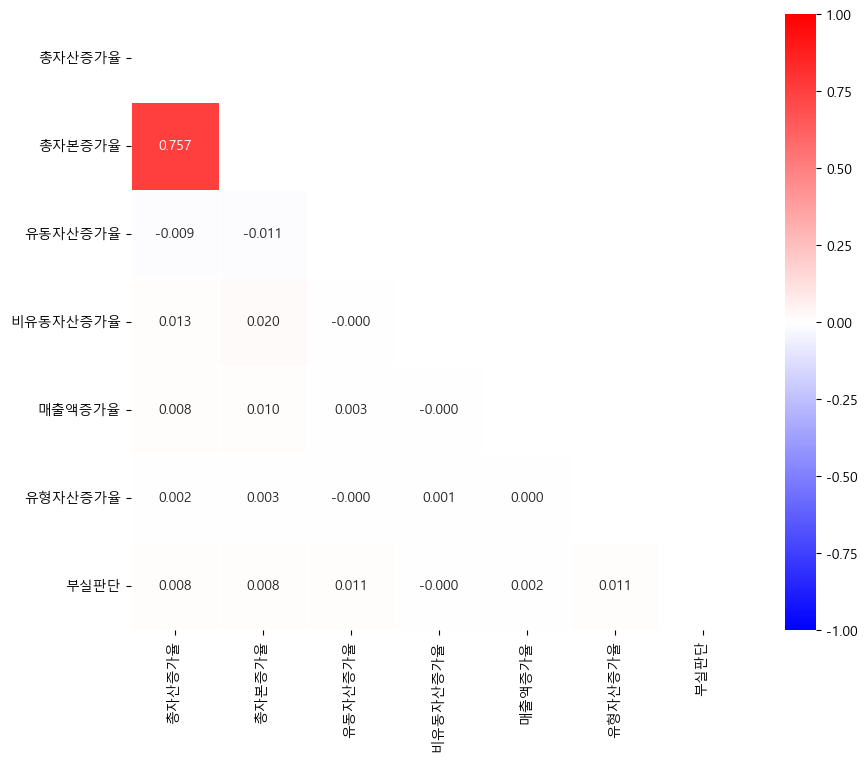

In [359]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(growth_ft1.corr(), dtype=bool))
sns.heatmap(growth_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [360]:
growth_ft1.isin([np.inf]).sum().sort_values(ascending=False)

총자산증가율      0
총자본증가율      0
유동자산증가율     0
비유동자산증가율    0
매출액증가율      0
유형자산증가율     0
부실판단        0
dtype: int64

In [361]:
growth_ft1.isin([np.inf]).sum()

총자산증가율      0
총자본증가율      0
유동자산증가율     0
비유동자산증가율    0
매출액증가율      0
유형자산증가율     0
부실판단        0
dtype: int64

In [362]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(growth_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산증가율-총자본증가율: 0.757
총자산증가율-유동자산증가율: -0.009
총자산증가율-비유동자산증가율: 0.013
총자산증가율-매출액증가율: 0.008
총자산증가율-유형자산증가율: 0.002
총자산증가율-부실판단: 0.008
총자본증가율-유동자산증가율: -0.011
총자본증가율-비유동자산증가율: 0.020
총자본증가율-매출액증가율: 0.010
총자본증가율-유형자산증가율: 0.003
총자본증가율-부실판단: 0.008
유동자산증가율-비유동자산증가율: -0.000
유동자산증가율-매출액증가율: 0.003
유동자산증가율-유형자산증가율: -0.000
유동자산증가율-부실판단: 0.011
비유동자산증가율-매출액증가율: -0.000
비유동자산증가율-유형자산증가율: 0.001
비유동자산증가율-부실판단: -0.000
매출액증가율-유형자산증가율: 0.000
매출액증가율-부실판단: 0.002
유형자산증가율-부실판단: 0.011
p-value======================
총자산증가율-총자본증가율: 0.000
총자산증가율-유동자산증가율: 0.243
총자산증가율-비유동자산증가율: 0.099
총자산증가율-매출액증가율: 0.336
총자산증가율-유형자산증가율: 0.774
총자산증가율-부실판단: 0.299
총자본증가율-유동자산증가율: 0.160
총자본증가율-비유동자산증가율: 0.014
총자본증가율-매출액증가율: 0.218
총자본증가율-유형자산증가율: 0.716
총자본증가율-부실판단: 0.320
유동자산증가율-비유동자산증가율: 0.958
유동자산증가율-매출액증가율: 0.695
유동자산증가율-유형자산증가율: 0.992
유동자산증가율-부실판단: 0.159
비유동자산증가율-매출액증가율: 0.993
비유동자산증가율-유형자산증가율: 0.924
비유동자산증가율-부실판단: 0.982
매출액증가율-유형자산증가율: 0.999
매출액증가율-부실판단: 0.816
유형자산증가율-부실판단: 0.174


5생산성

<Axes: >

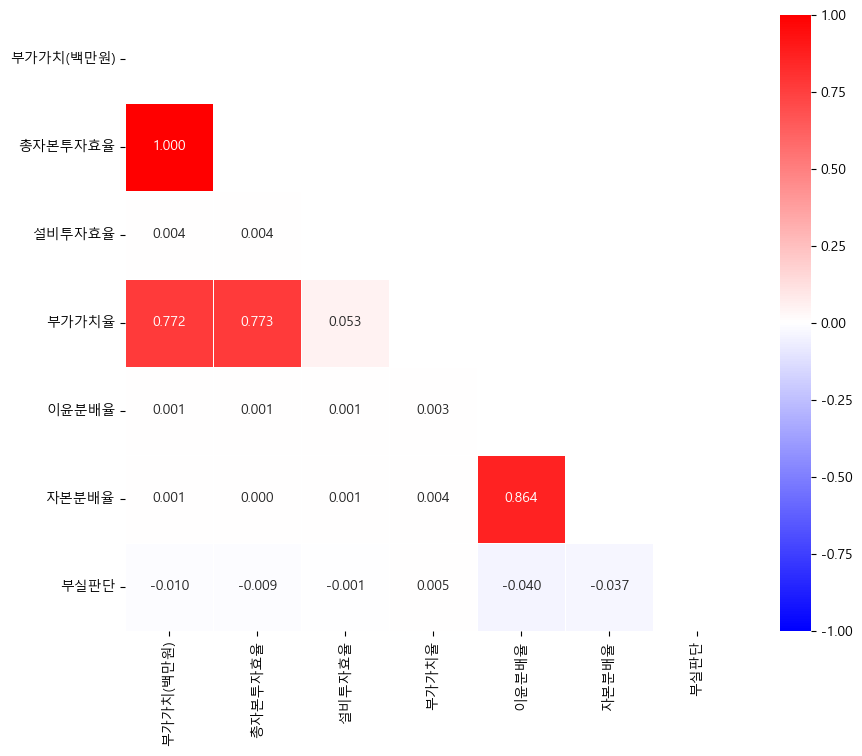

In [363]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(productivity_ft1.corr(), dtype=bool))
sns.heatmap(productivity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [364]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(productivity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
부가가치(백만원)-총자본투자효율: 1.000
부가가치(백만원)-설비투자효율: 0.004
부가가치(백만원)-부가가치율: 0.772
부가가치(백만원)-이윤분배율: 0.001
부가가치(백만원)-자본분배율: 0.001
부가가치(백만원)-부실판단: -0.010
총자본투자효율-설비투자효율: 0.004
총자본투자효율-부가가치율: 0.773
총자본투자효율-이윤분배율: 0.001
총자본투자효율-자본분배율: 0.000
총자본투자효율-부실판단: -0.009
설비투자효율-부가가치율: 0.053
설비투자효율-이윤분배율: 0.001
설비투자효율-자본분배율: 0.001
설비투자효율-부실판단: -0.001
부가가치율-이윤분배율: 0.003
부가가치율-자본분배율: 0.004
부가가치율-부실판단: 0.005
이윤분배율-자본분배율: 0.864
이윤분배율-부실판단: -0.040
자본분배율-부실판단: -0.037
p-value======================
부가가치(백만원)-총자본투자효율: 0.000
부가가치(백만원)-설비투자효율: 0.586
부가가치(백만원)-부가가치율: 0.000
부가가치(백만원)-이윤분배율: 0.922
부가가치(백만원)-자본분배율: 0.942
부가가치(백만원)-부실판단: 0.232
총자본투자효율-설비투자효율: 0.619
총자본투자효율-부가가치율: 0.000
총자본투자효율-이윤분배율: 0.928
총자본투자효율-자본분배율: 0.958
총자본투자효율-부실판단: 0.262
설비투자효율-부가가치율: 0.000
설비투자효율-이윤분배율: 0.909
설비투자효율-자본분배율: 0.891
설비투자효율-부실판단: 0.879
부가가치율-이윤분배율: 0.706
부가가치율-자본분배율: 0.599
부가가치율-부실판단: 0.574
이윤분배율-자본분배율: 0.000
이윤분배율-부실판단: 0.000
자본분배율-부실판단: 0.000


In [365]:
np.abs(productivity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000
이윤분배율       0.040
자본분배율       0.037
부가가치(백만원)   0.010
총자본투자효율     0.009
부가가치율       0.005
설비투자효율      0.001
Name: 부실판단, dtype: float64

6활동성

<Axes: >

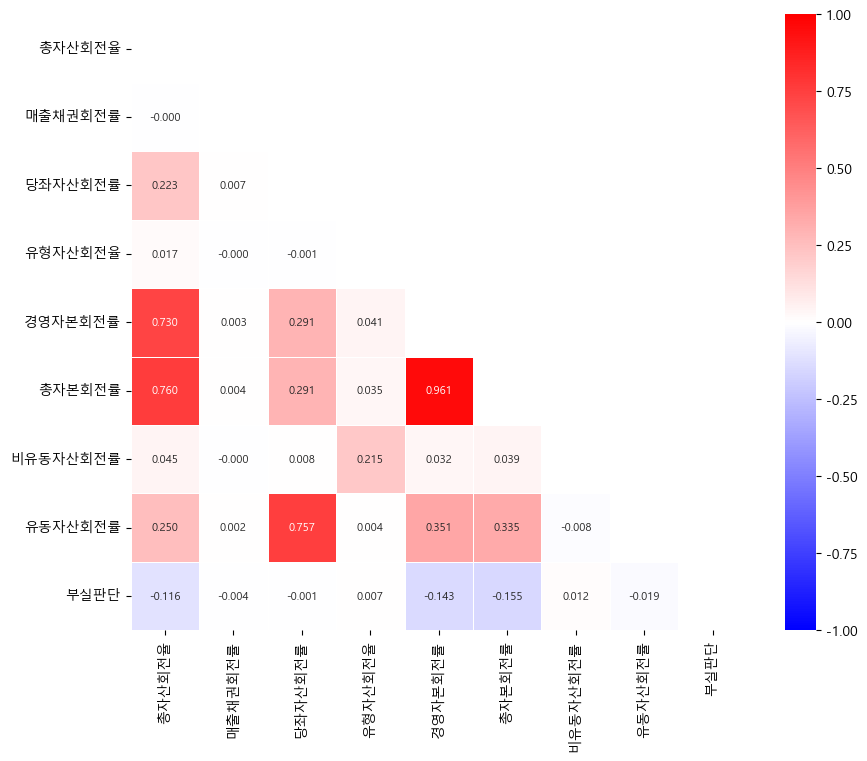

In [366]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(activity_ft1.corr(), dtype=bool))
sns.heatmap(activity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [367]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(activity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산회전율-매출채권회전률: -0.000
총자산회전율-당좌자산회전률: 0.223
총자산회전율-유형자산회전율: 0.017
총자산회전율-경영자본회전률: 0.730
총자산회전율-총자본회전률: 0.760
총자산회전율-비유동자산회전률: 0.045
총자산회전율-유동자산회전률: 0.250
총자산회전율-부실판단: -0.116
매출채권회전률-당좌자산회전률: 0.007
매출채권회전률-유형자산회전율: -0.000
매출채권회전률-경영자본회전률: 0.003
매출채권회전률-총자본회전률: 0.004
매출채권회전률-비유동자산회전률: -0.000
매출채권회전률-유동자산회전률: 0.002
매출채권회전률-부실판단: -0.004
당좌자산회전률-유형자산회전율: -0.001
당좌자산회전률-경영자본회전률: 0.291
당좌자산회전률-총자본회전률: 0.291
당좌자산회전률-비유동자산회전률: 0.008
당좌자산회전률-유동자산회전률: 0.757
당좌자산회전률-부실판단: -0.001
유형자산회전율-경영자본회전률: 0.041
유형자산회전율-총자본회전률: 0.035
유형자산회전율-비유동자산회전률: 0.215
유형자산회전율-유동자산회전률: 0.004
유형자산회전율-부실판단: 0.007
경영자본회전률-총자본회전률: 0.961
경영자본회전률-비유동자산회전률: 0.032
경영자본회전률-유동자산회전률: 0.351
경영자본회전률-부실판단: -0.143
총자본회전률-비유동자산회전률: 0.039
총자본회전률-유동자산회전률: 0.335
총자본회전률-부실판단: -0.155
비유동자산회전률-유동자산회전률: -0.008
비유동자산회전률-부실판단: 0.012
유동자산회전률-부실판단: -0.019
p-value======================
총자산회전율-매출채권회전률: 0.967
총자산회전율-당좌자산회전률: 0.000
총자산회전율-유형자산회전율: 0.035
총자산회전율-경영자본회전률: 0.000
총자산회전율-총자본회전률: 0.000
총자산회전율-비유동자산회전률: 0.000
총자산

In [368]:
np.abs(activity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
총자본회전률     0.155
경영자본회전률    0.143
총자산회전율     0.116
유동자산회전률    0.019
비유동자산회전률   0.012
유형자산회전율    0.007
매출채권회전률    0.004
당좌자산회전률    0.001
Name: 부실판단, dtype: float64

7기타

<Axes: >

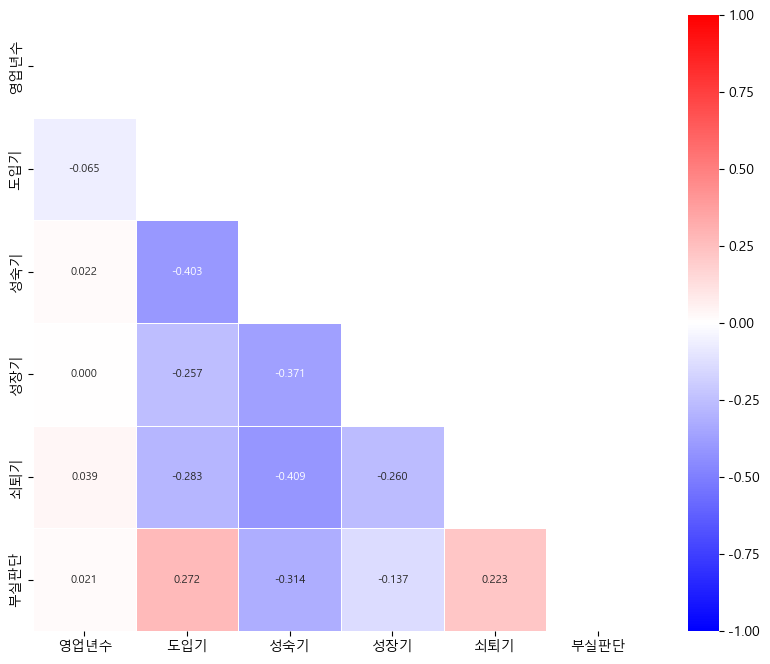

In [369]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(etc_ft1.corr(), dtype=bool))
sns.heatmap(etc_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask
)

In [370]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-도입기: -0.065
영업년수-성숙기: 0.022
영업년수-성장기: 0.000
영업년수-쇠퇴기: 0.039
영업년수-부실판단: 0.021
도입기-성숙기: -0.403
도입기-성장기: -0.257
도입기-쇠퇴기: -0.283
도입기-부실판단: 0.272
성숙기-성장기: -0.371
성숙기-쇠퇴기: -0.409
성숙기-부실판단: -0.314
성장기-쇠퇴기: -0.260
성장기-부실판단: -0.137
쇠퇴기-부실판단: 0.223
p-value======================
영업년수-도입기: 0.000
영업년수-성숙기: 0.006
영업년수-성장기: 0.993
영업년수-쇠퇴기: 0.000
영업년수-부실판단: 0.010
도입기-성숙기: 0.000
도입기-성장기: 0.000
도입기-쇠퇴기: 0.000
도입기-부실판단: 0.000
성숙기-성장기: 0.000
성숙기-쇠퇴기: 0.000
성숙기-부실판단: 0.000
성장기-쇠퇴기: 0.000
성장기-부실판단: 0.000
쇠퇴기-부실판단: 0.000


In [371]:
np.abs(etc_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단   1.000
성숙기    0.314
도입기    0.272
쇠퇴기    0.223
성장기    0.137
영업년수   0.021
Name: 부실판단, dtype: float64

전체

<Axes: >

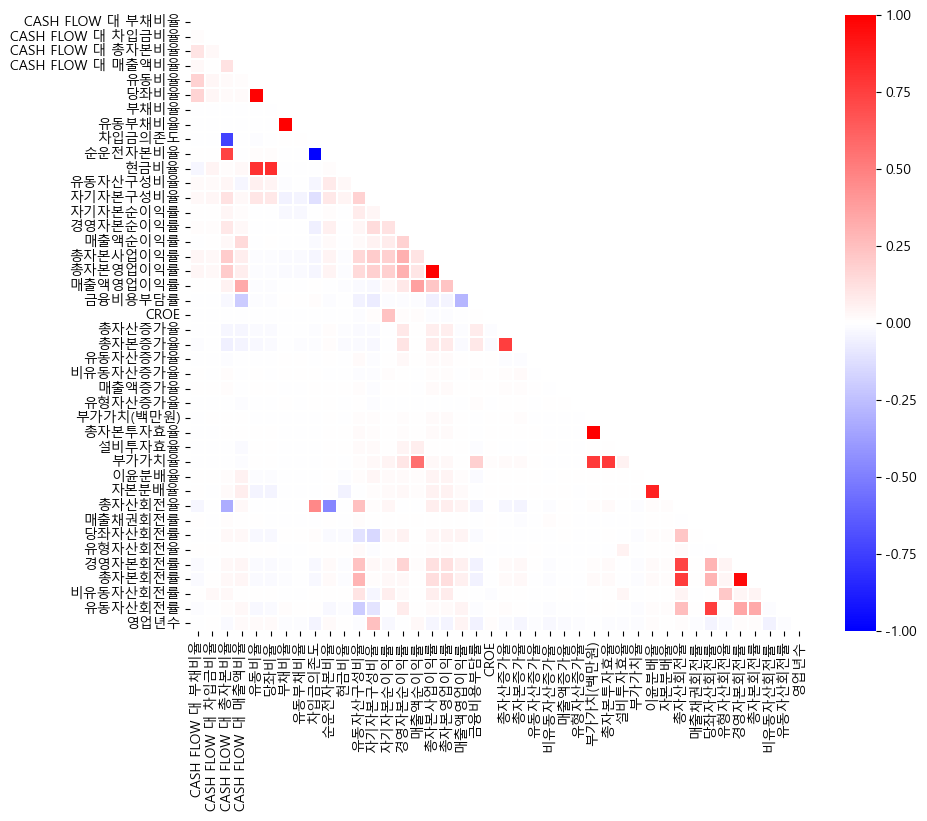

In [372]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(features.corr(), dtype=bool))
sns.heatmap(features.corr(), 
            vmax=1,
            vmin=-1,
            # annot=True,
            # annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            # fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.1, 
            mask = mask
)

# QQplot

## before Q-Qplot

In [373]:
def qq_plot(df):
    fig, axes = plt.subplots(8, 6, figsize=(20, 25))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(8):
        for j in range(6):
            col_index = i * 6 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

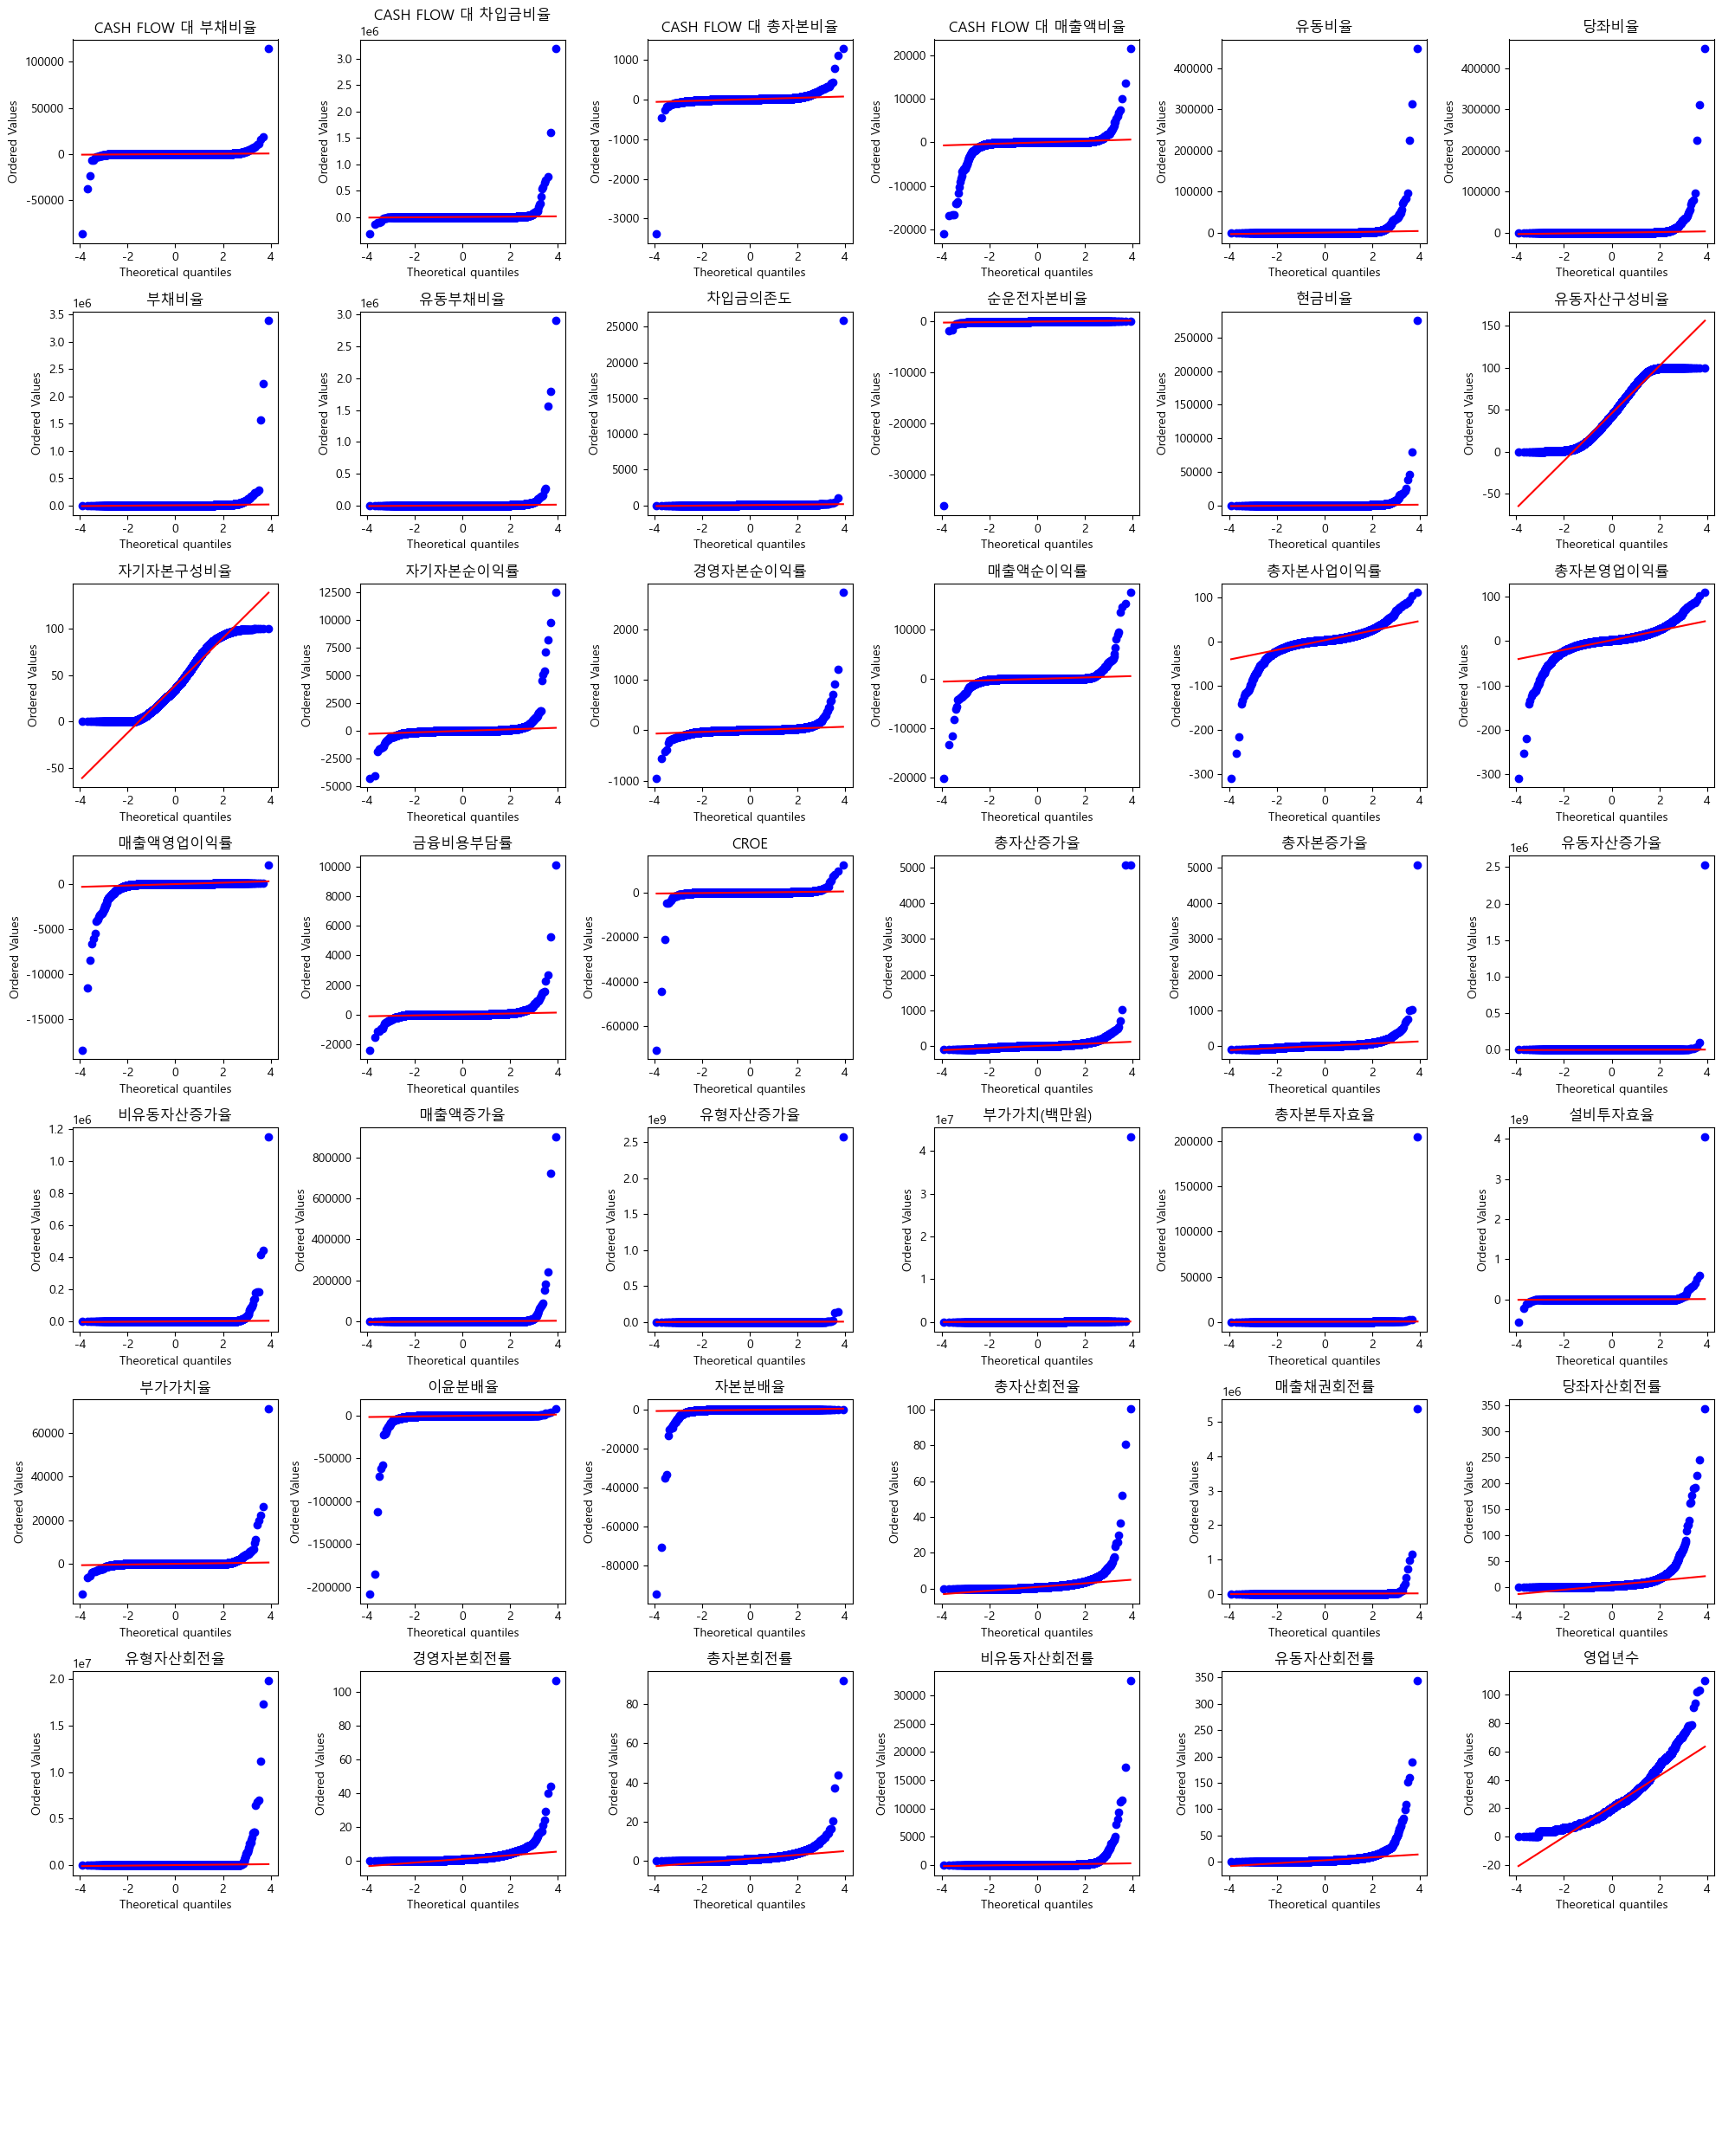

In [374]:
qq_plot(features)

## 윈저라이징

In [375]:
# 한 컬럼마다 할 수 있는 윈저라이징
def winsorize(data, lower_percentile=5, upper_percentile=95):
    """
    이상치를 Winsorizing하여 데이터를 변형하는 함수
    
    Parameters:
    - data: 변형하려는 데이터 배열
    - lower_percentile: 이상치를 대체할 하한 백분위수
    - upper_percentile: 이상치를 대체할 상한 백분위수
    
    Returns:
    - winsorized_data: Winsorizing이 적용된 데이터 배열
    """
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)
    
    daco = data.copy()
    # 하한 이상치 대체
    daco[daco < lower_limit] = lower_limit
    
    # 상한 이상치 대체
    daco[daco > upper_limit] = upper_limit
    
    return daco

In [376]:
# 모든 컬럼을 일괄 윈저라이징
def adj_outlier(df, target=0.01, winsorizing=True):
    """
    데이터프레임에서 이상치를 조정합니다.

    매개변수:
    - dataframe: pandas DataFrame
    - 목표값: float, 이상치 식별을 위한 임계값
    - 윈저라이징: bool, 윈저라이징 기법을 적용할지 여부

    반환값:
    - 이상치가 조정된 pandas DataFrame
    """
    # 원본 DataFrame을 직접 수정하지 않기 위해 복사합니다.
    df_copy = df.copy()

    # 목표값에 기반하여 이상치를 식별합니다.    
    lower_bound = df_copy.quantile(target)
    upper_bound = df_copy.quantile(1 - target)

    # 윈저라이징이 지정된 경우 해당 열에 대해 이상치를 조정합니다.
    if winsorizing:
        df_copy = df_copy.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))

    return df_copy

# 예제 사용법:
# '당신의_데이터프레임'이 실제 데이터프레임인 경우
# 조정된_데이터프레임 = 이상치_조정(당신의_데이터프레임)

## 일괄 Q-Qplot

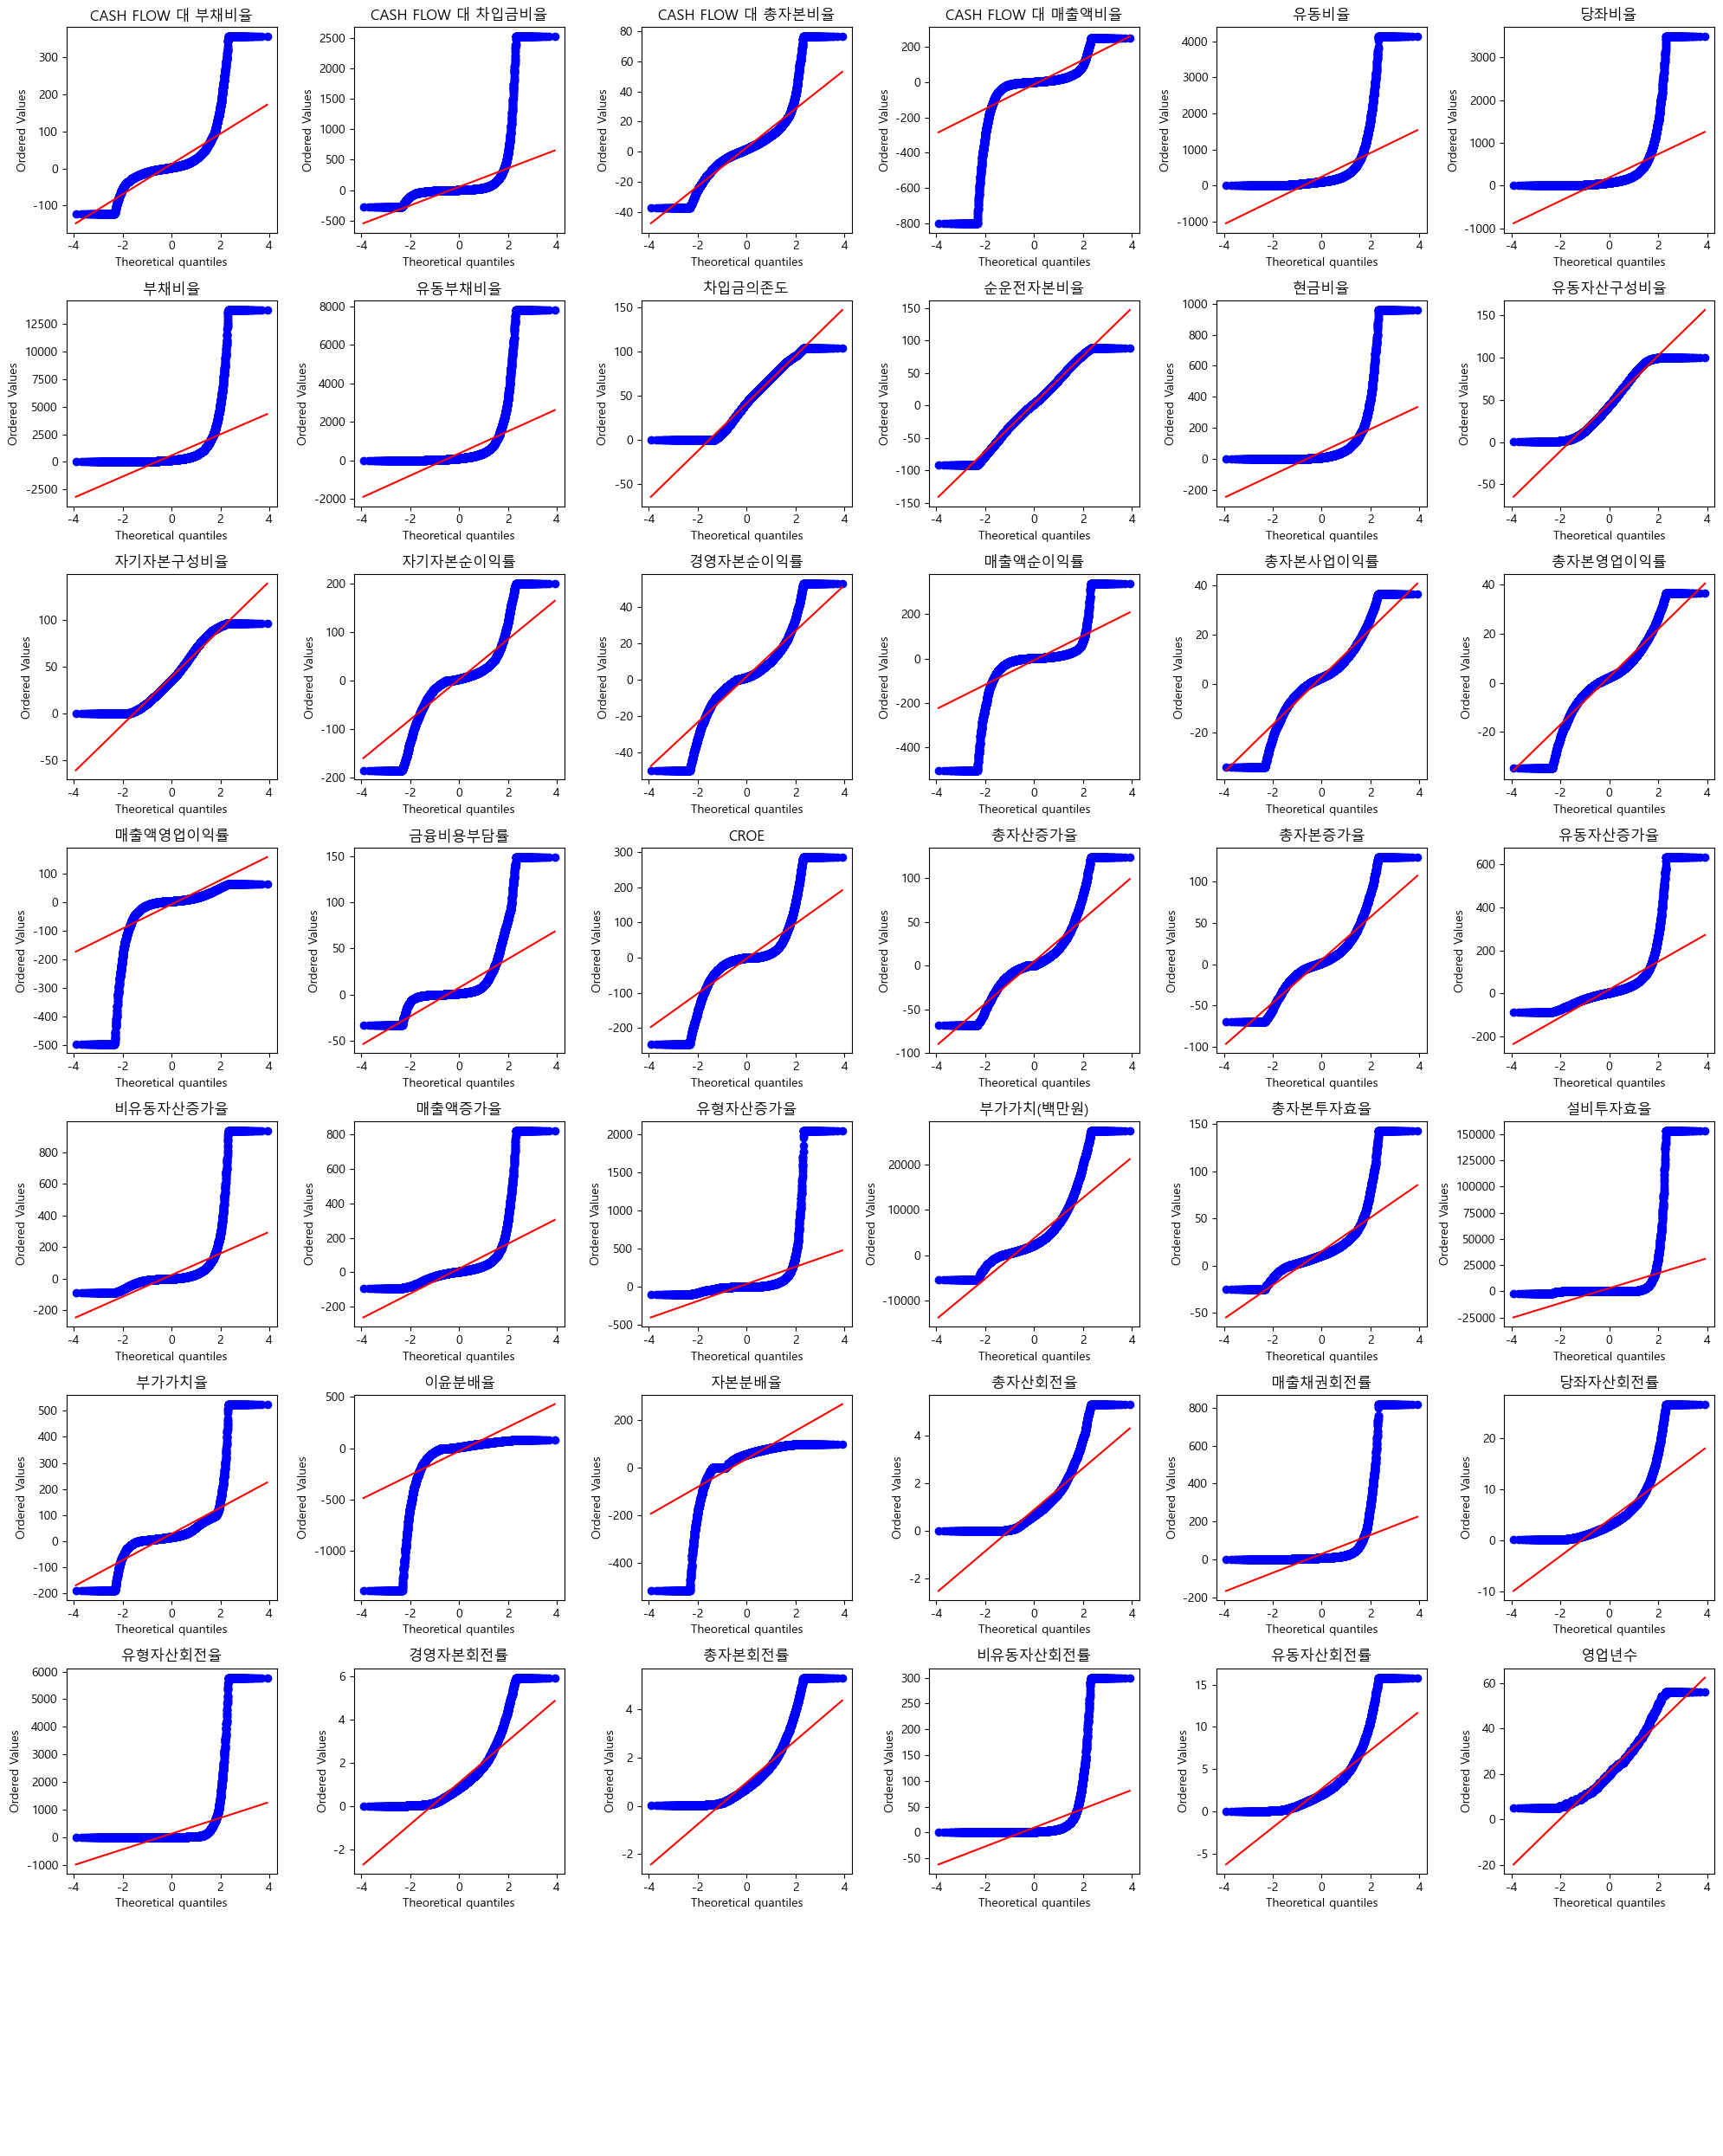

In [377]:
adj_features = adj_outlier(features, target=0.01, winsorizing=True)
qq_plot(adj_features)

## 컬럼별 윈저라이징

In [378]:
winsorized_features = features.copy()

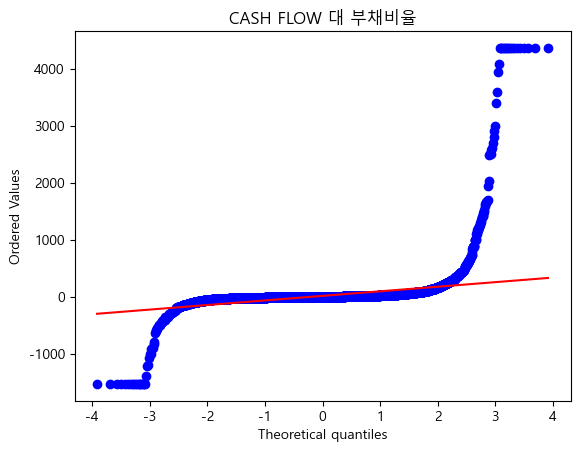

In [379]:
i = 0
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

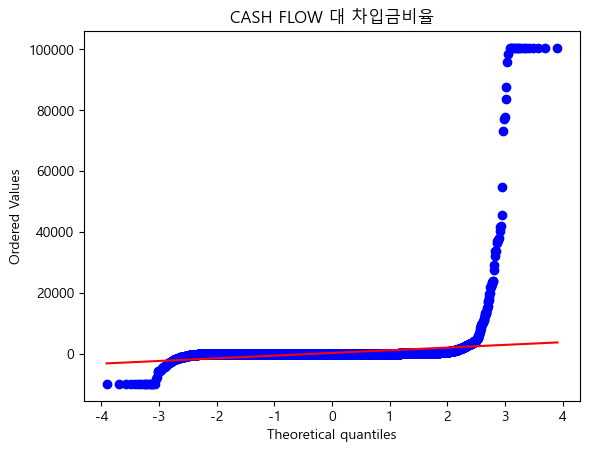

In [380]:
i = 1
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

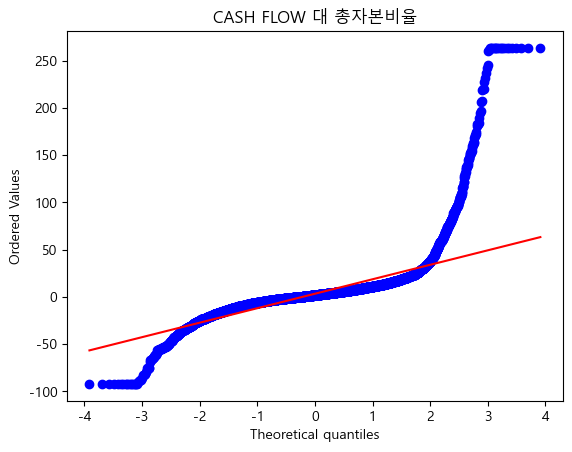

In [381]:
i = 2
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

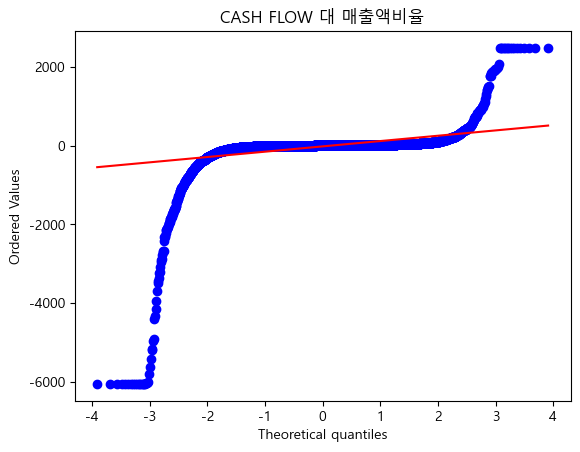

In [382]:
i = 3
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

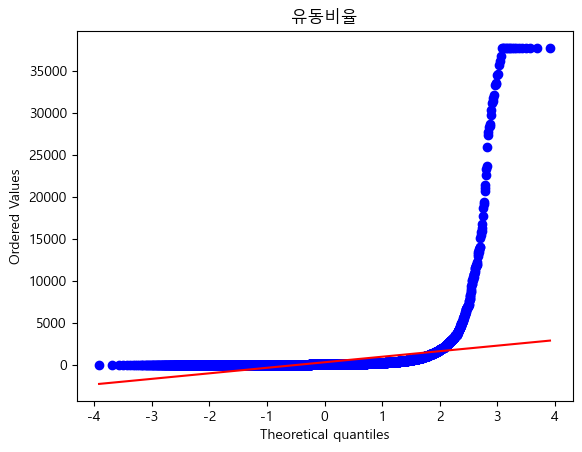

In [383]:
i = 4
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

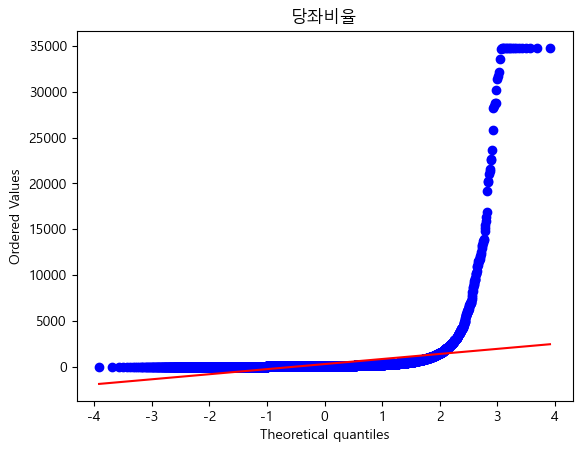

In [384]:
i = 5
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

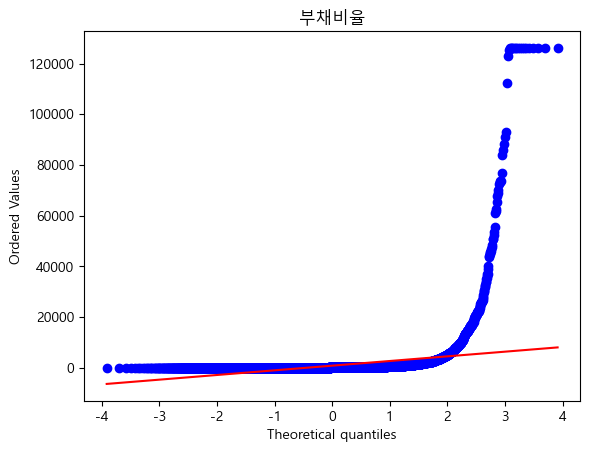

In [385]:
i = 6
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

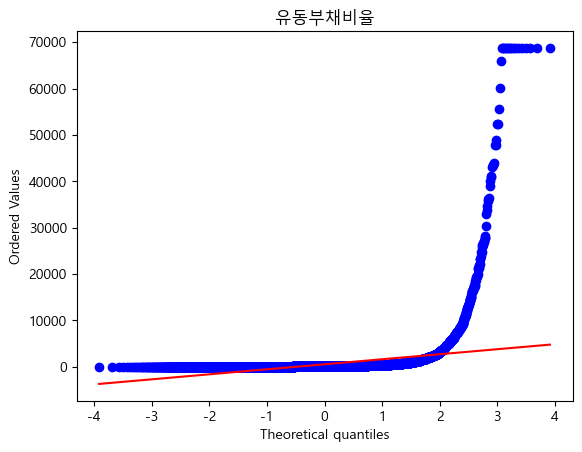

In [386]:
i = 7
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

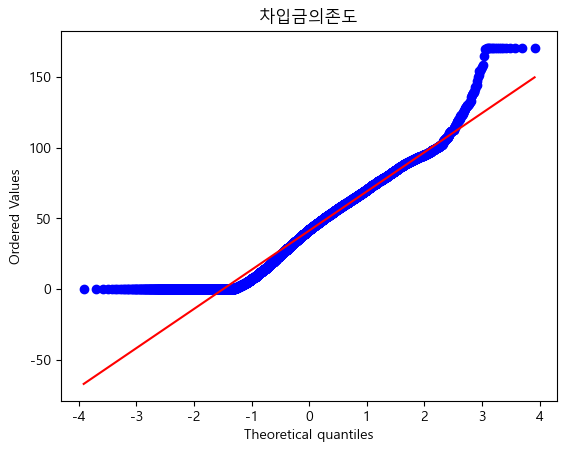

In [387]:
i = 8
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

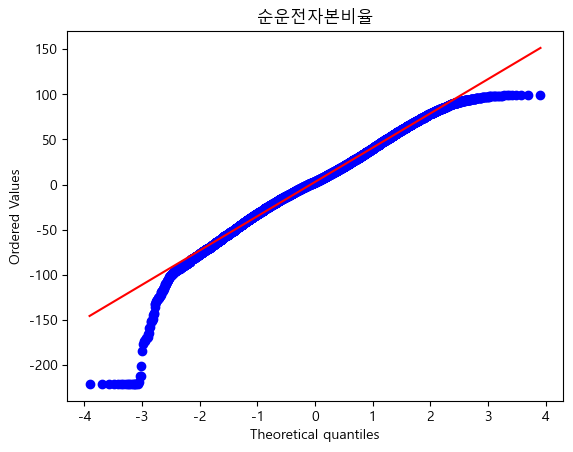

In [388]:
i = 9
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

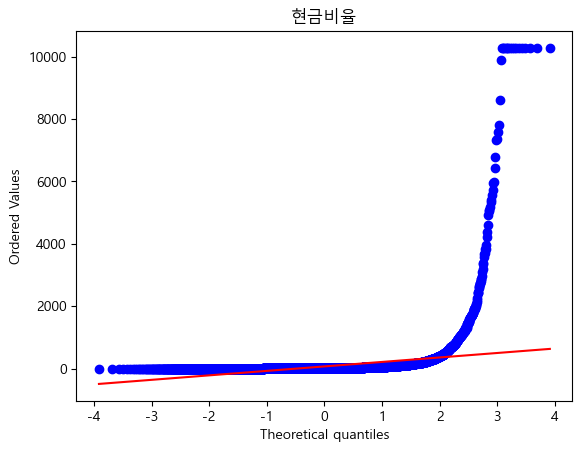

In [389]:
i = 10
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

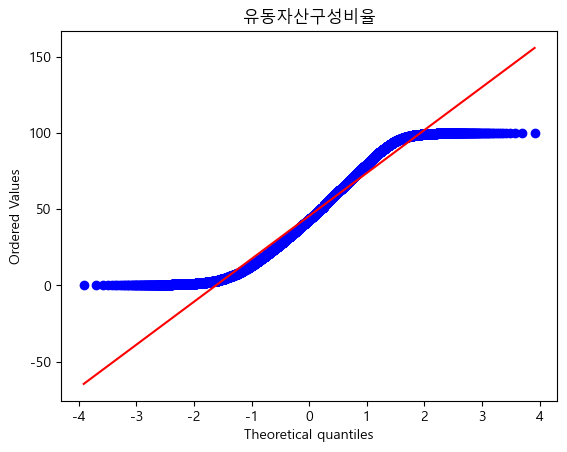

In [390]:
i = 11
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.999)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

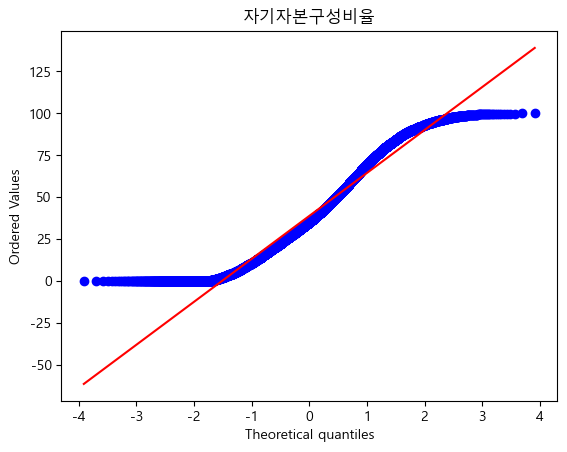

In [391]:
i = 12
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=100)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

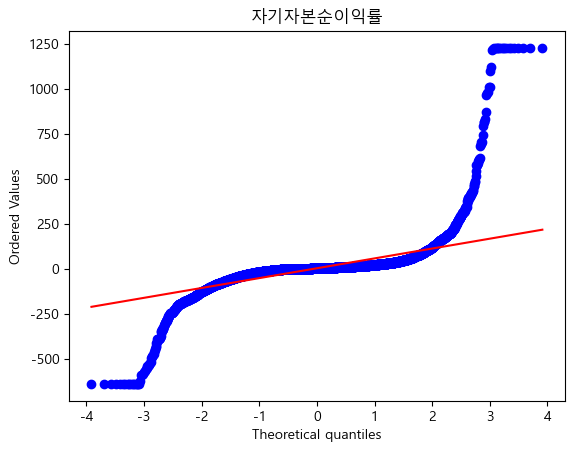

In [392]:
i = 13
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

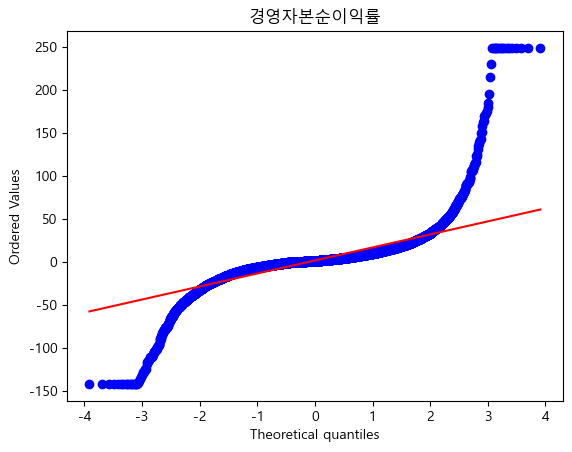

In [393]:
i = 14
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

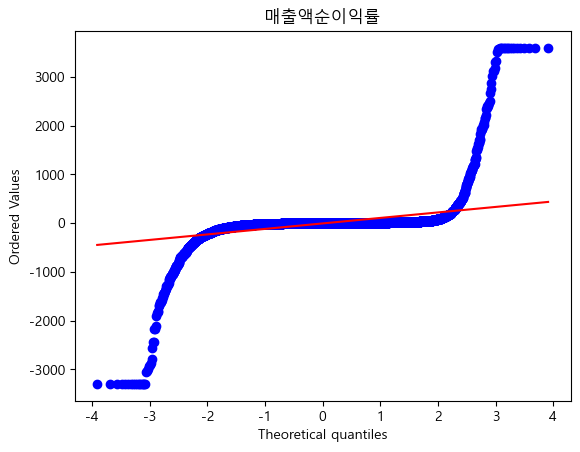

In [394]:
i = 15
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

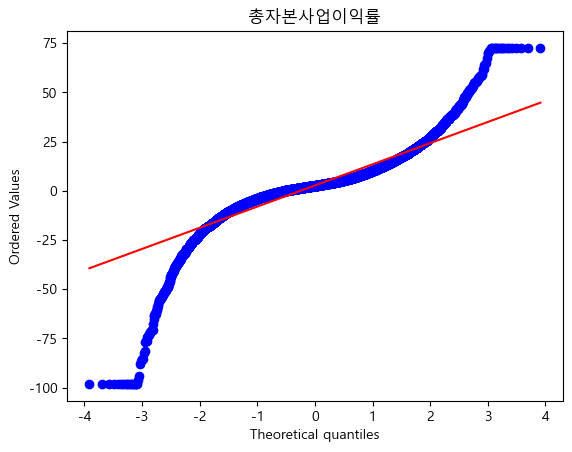

In [395]:
i = 16
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

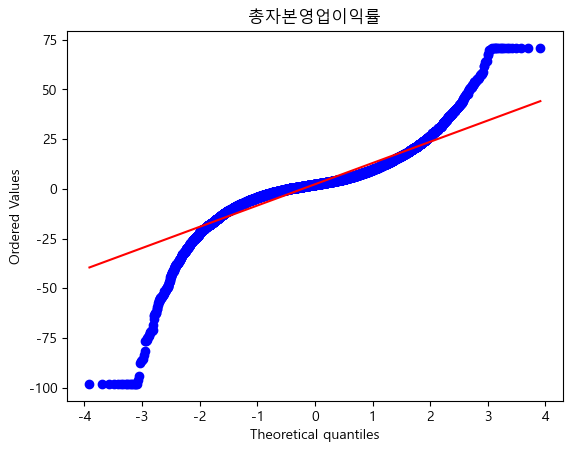

In [396]:
i = 17
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

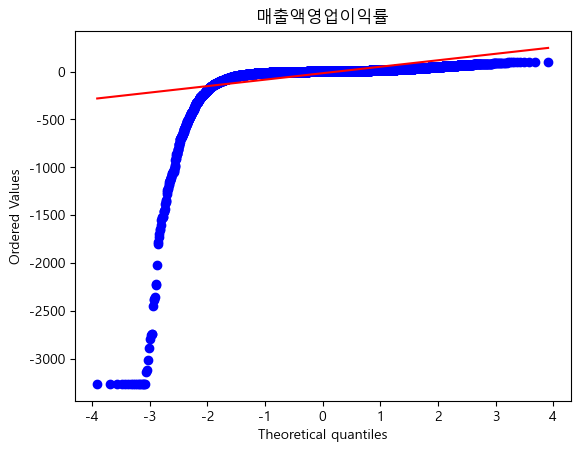

In [397]:
i = 18
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

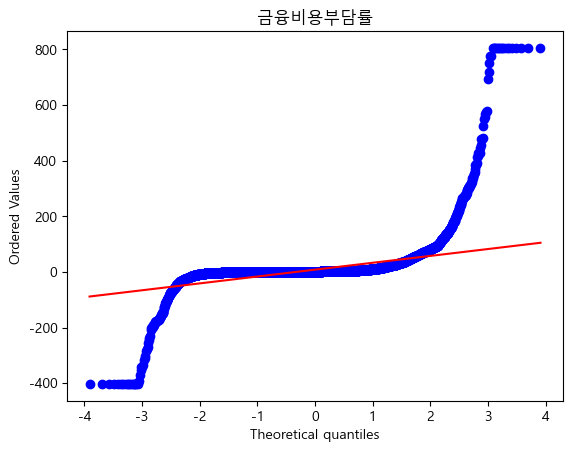

In [398]:
i = 19
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

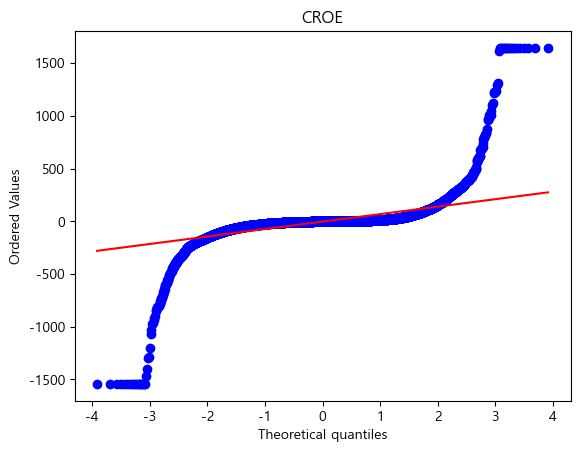

In [399]:
i = 20
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

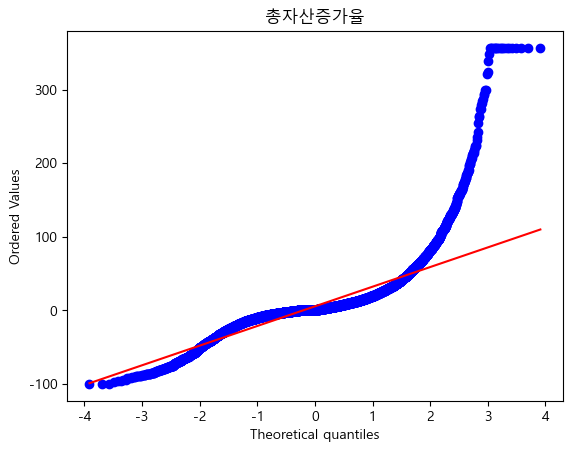

In [400]:
i = 21
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

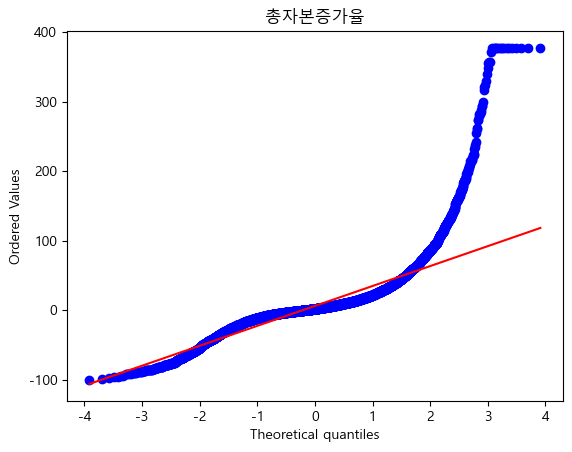

In [401]:
i = 22
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

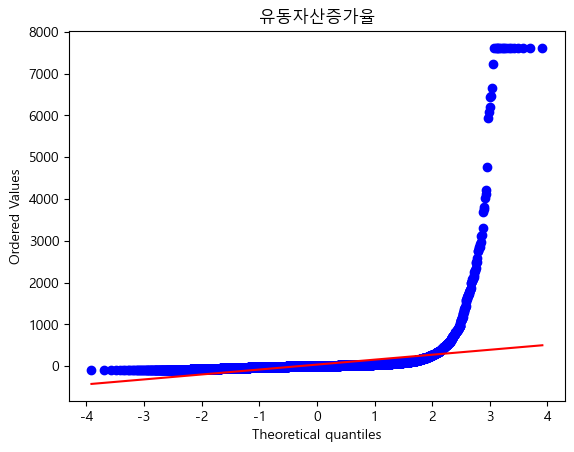

In [402]:
i = 23
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

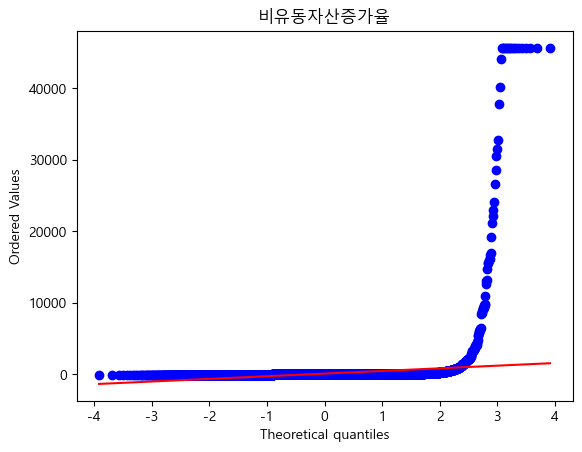

In [403]:
i = 24
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

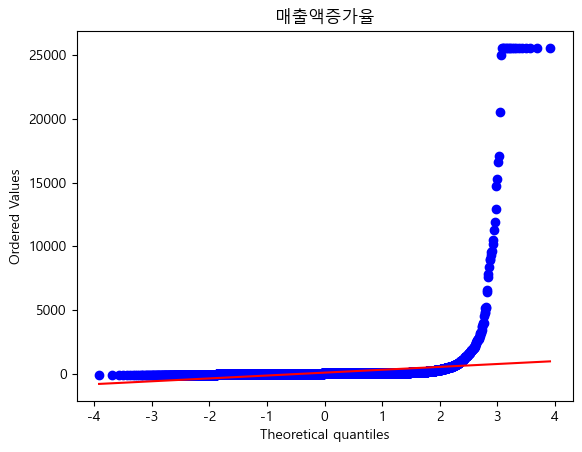

In [404]:
i = 25
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

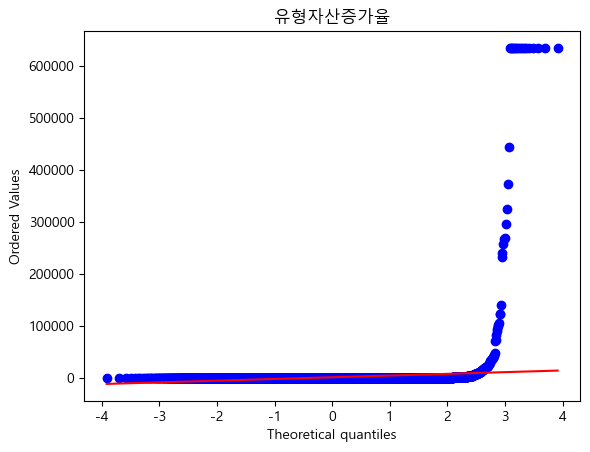

In [405]:
i = 26
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

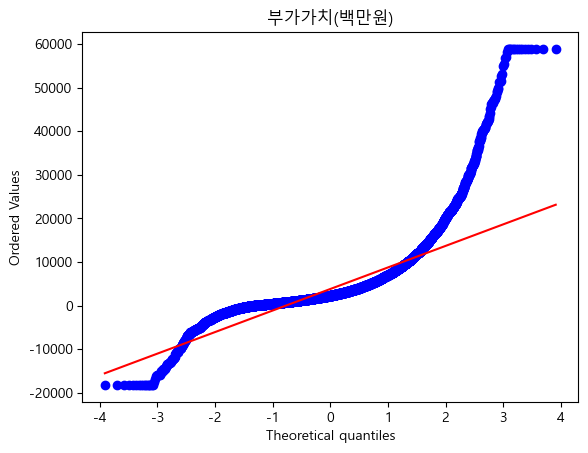

In [406]:
i = 27
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

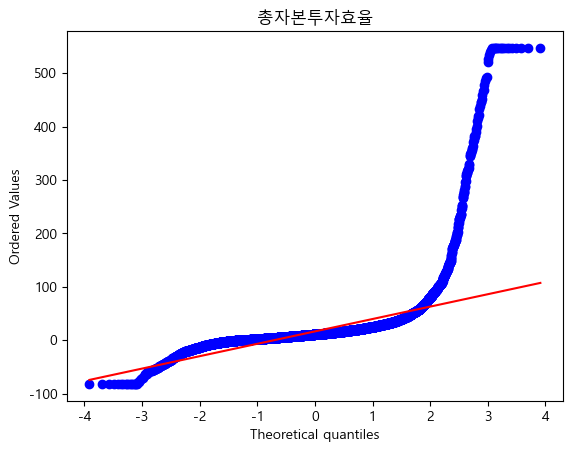

In [407]:
i = 28
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

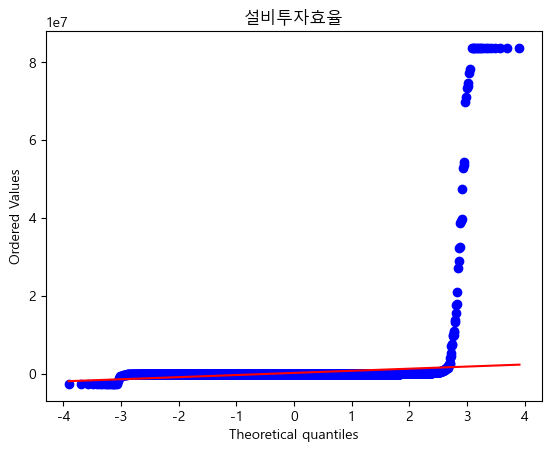

In [408]:
i = 29
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

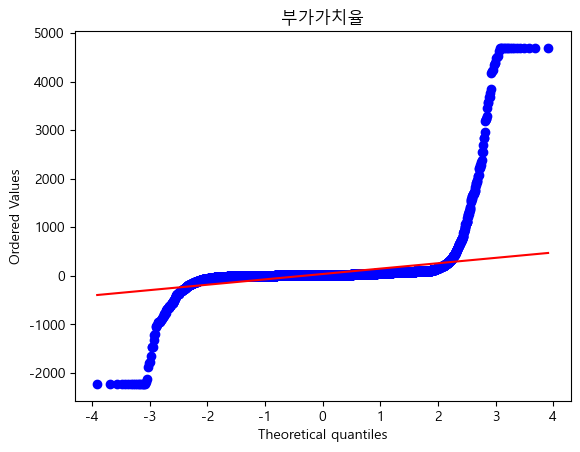

In [409]:
i = 30
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

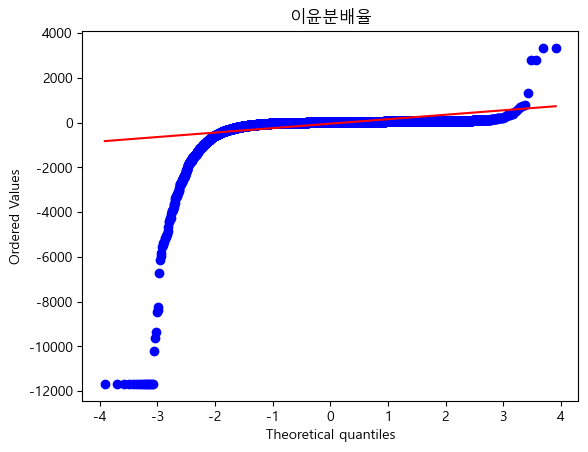

In [410]:
i = 31
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

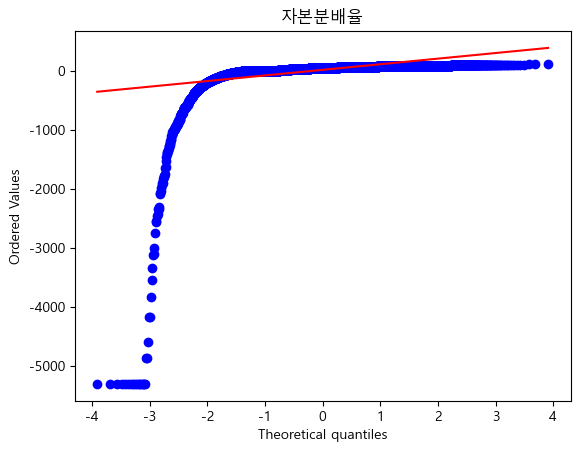

In [411]:
i = 32
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.999)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

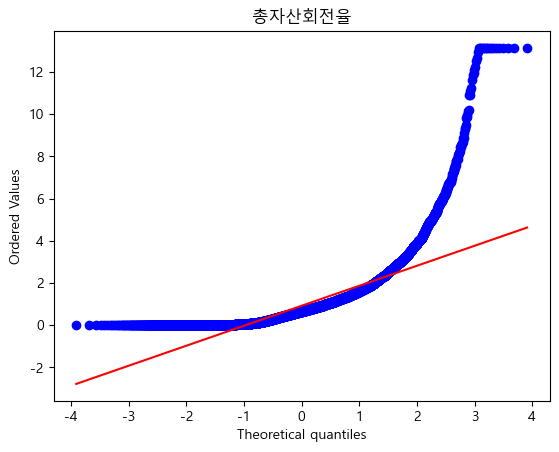

In [412]:
i = 33
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

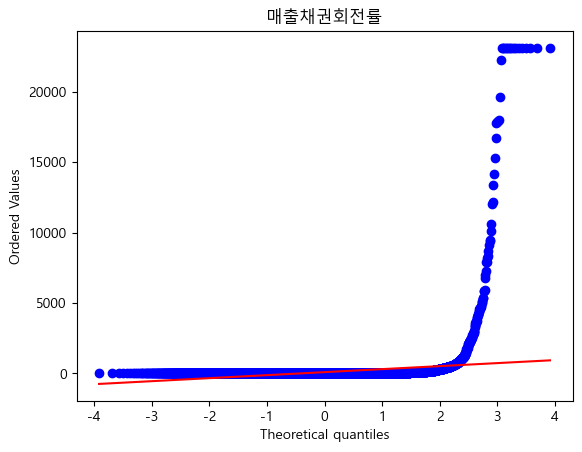

In [413]:
i = 34
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

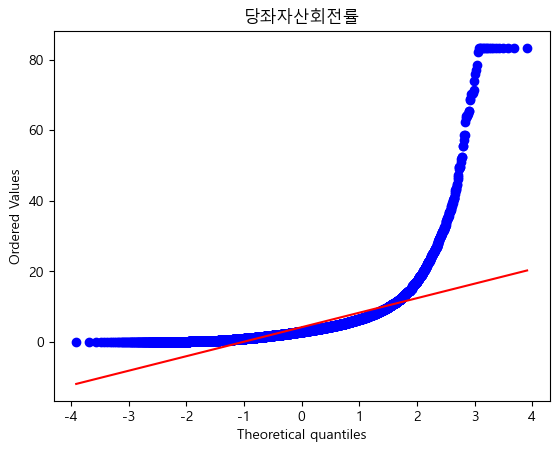

In [414]:
i = 35
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

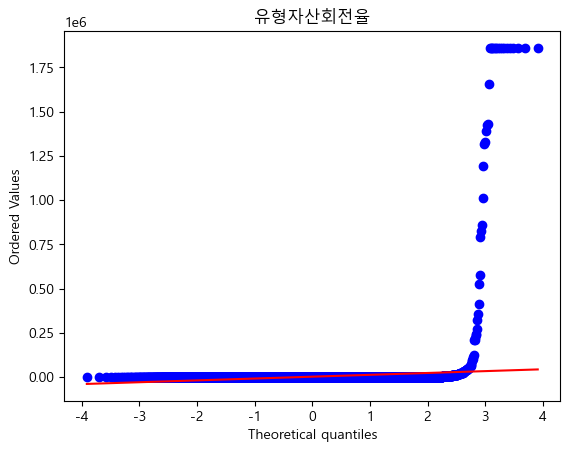

In [415]:
i = 36
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

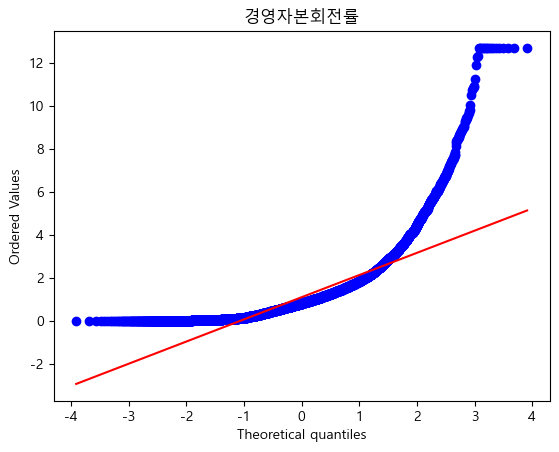

In [416]:
i = 37
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

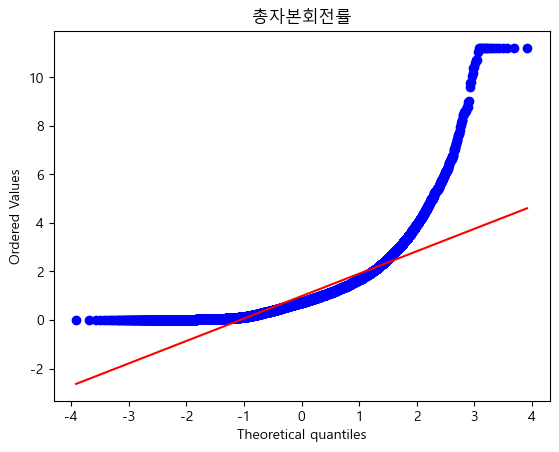

In [417]:
i = 38
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

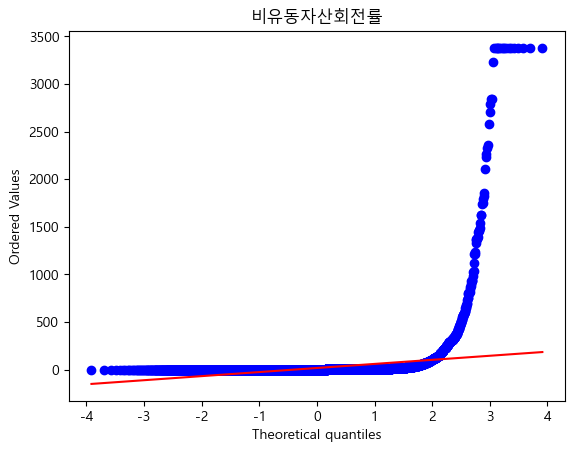

In [418]:
i = 39
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

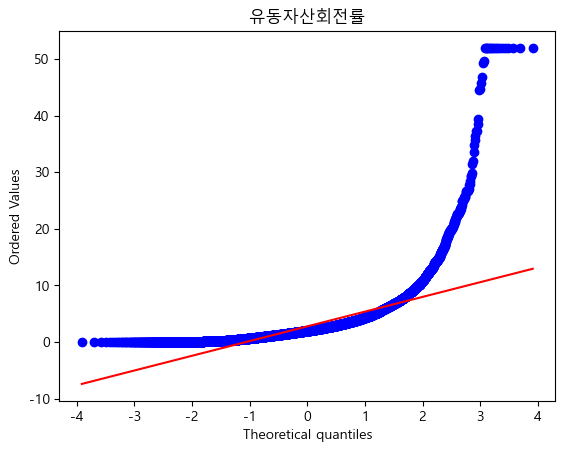

In [419]:
i = 40
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

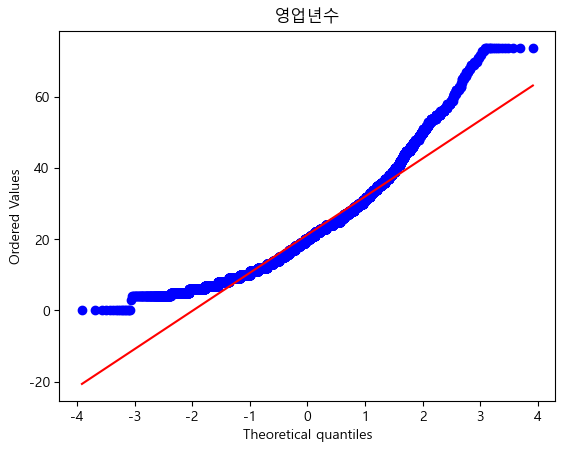

In [420]:
i = 41
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

## after QQplot

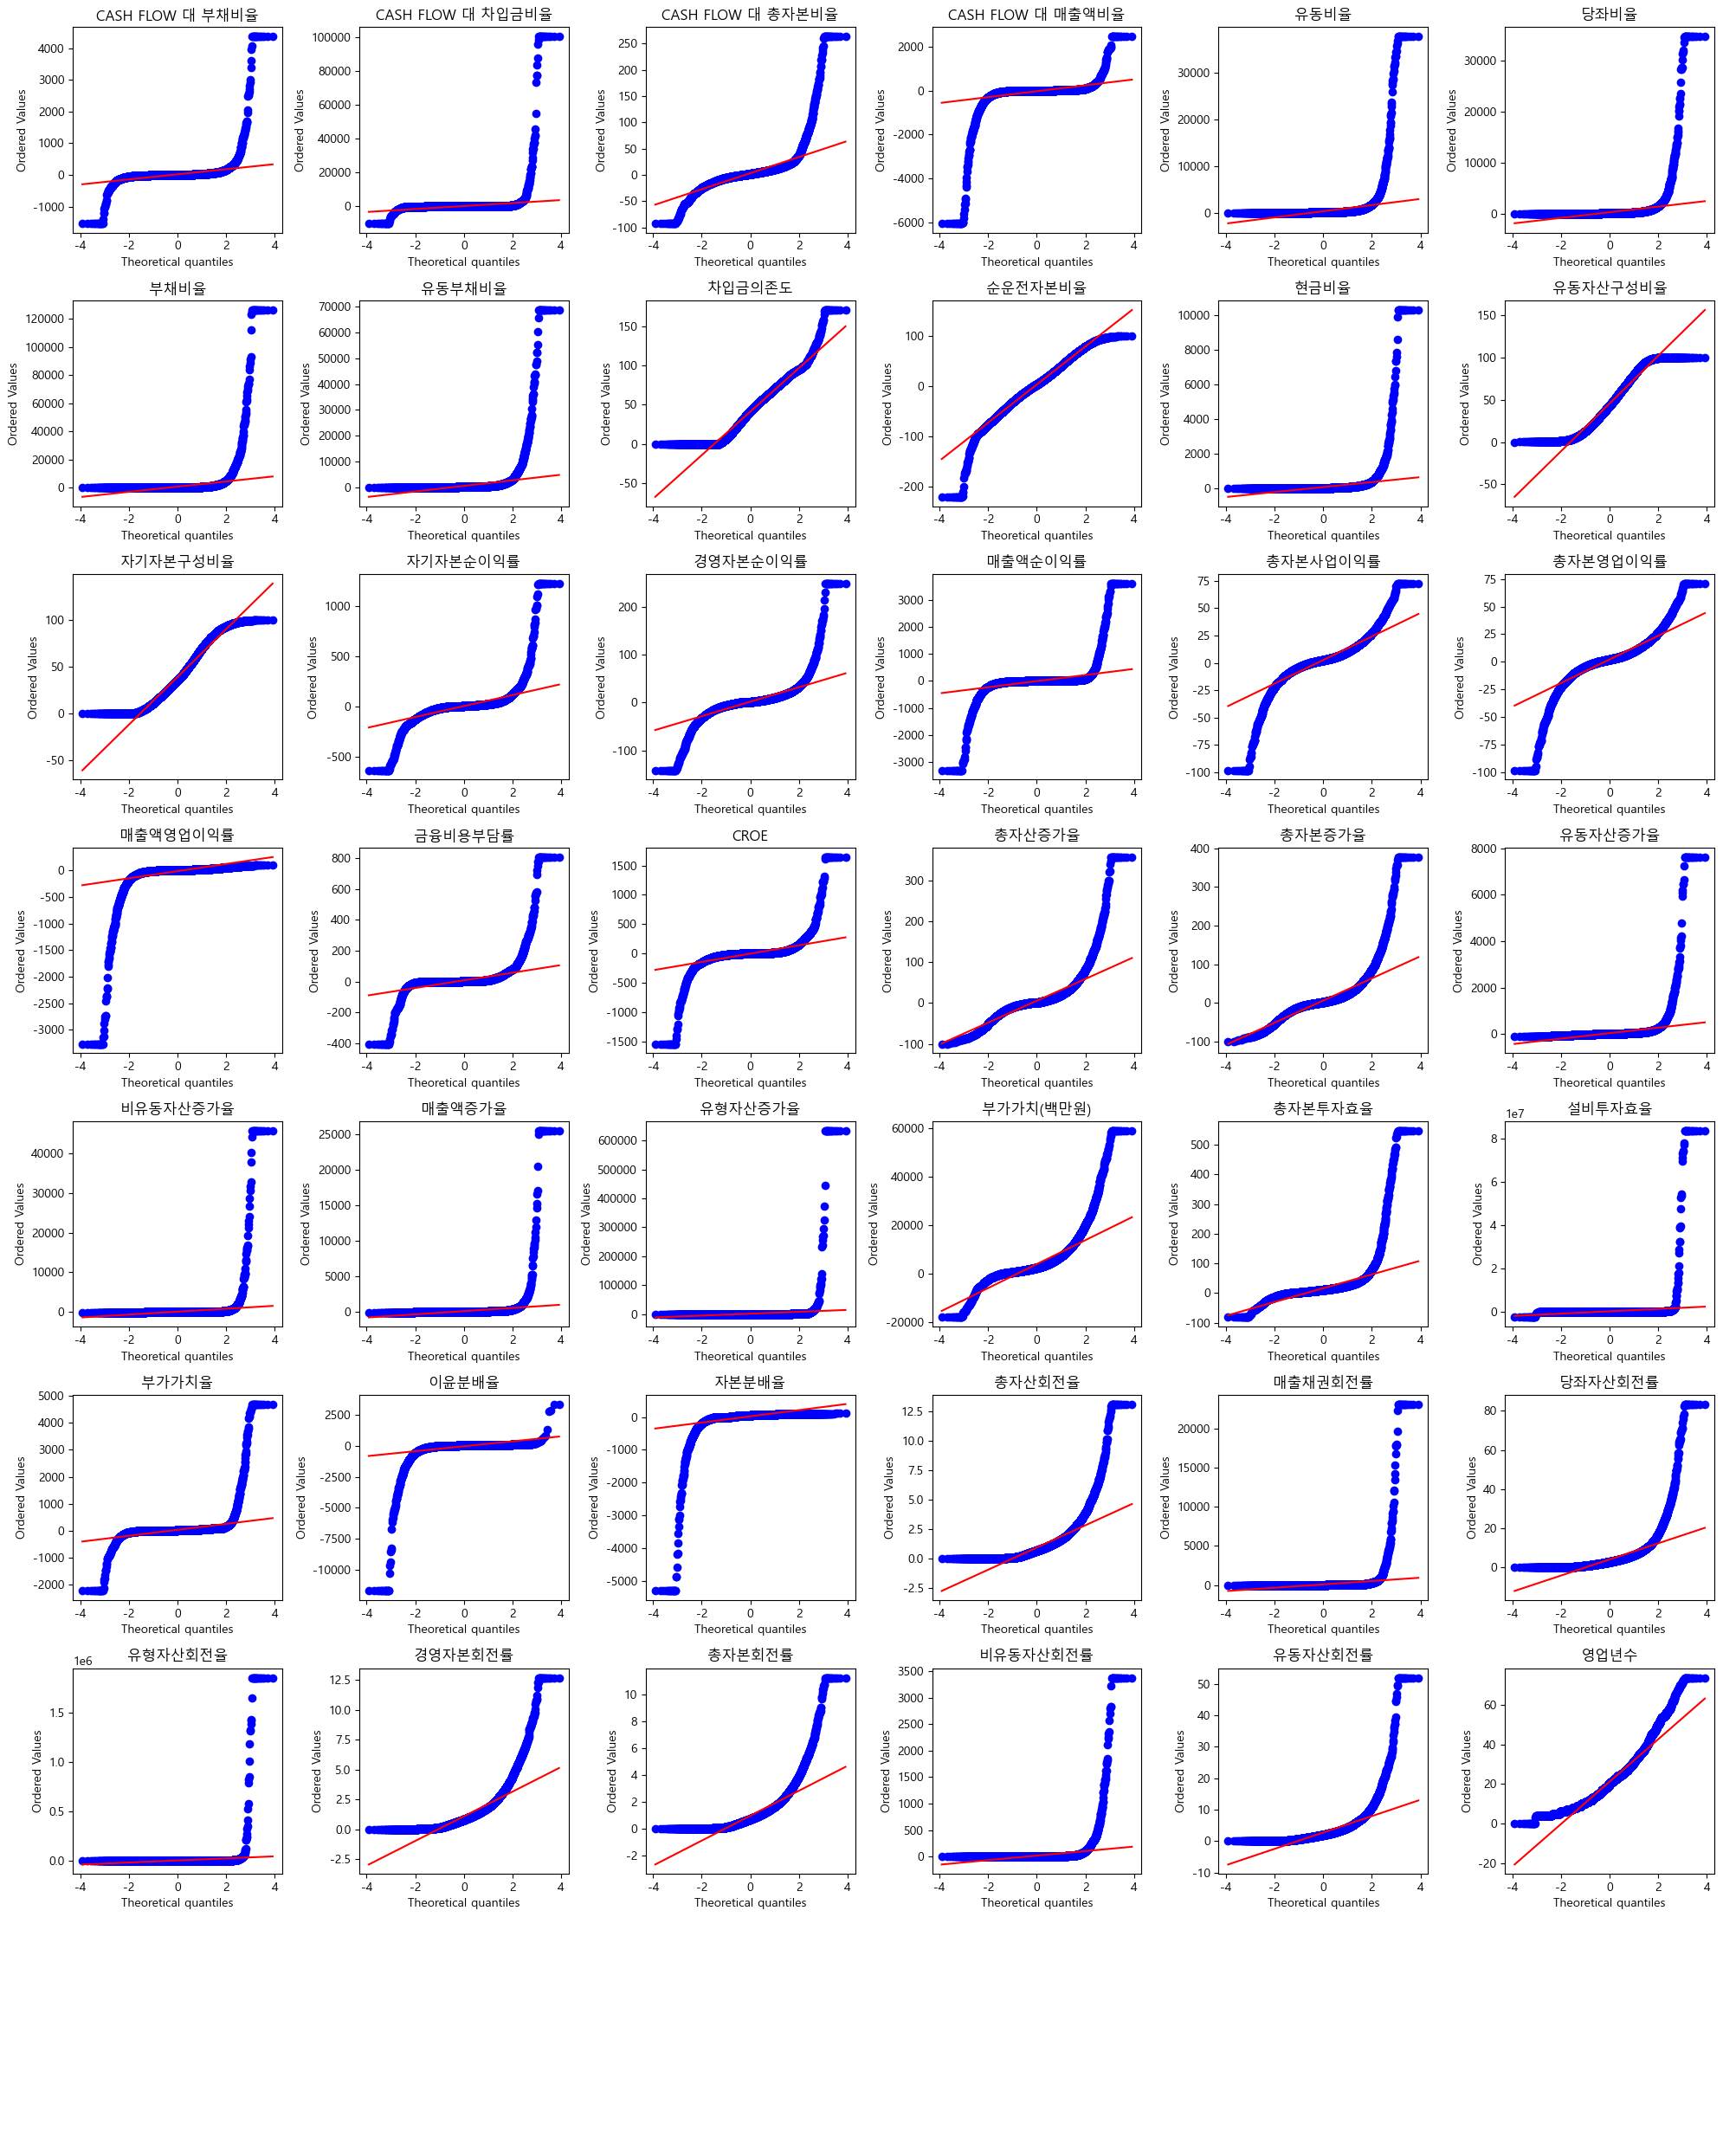

In [421]:
qq_plot(winsorized_features)

# to_csv

train set

In [422]:
unlisted_X_train[features.columns] = winsorized_features

In [423]:
unlisted_X_train.to_csv('../윈저안된비상장train.csv', index=False)

In [424]:
unlisted_X_train.to_csv('../data/datasets/unlisted_winsorized_train_data.csv', index=False)

test set

In [425]:
unlisted_X_test['부실판단'] = unlisted_y_test
unlisted_X_test['부실판단']

19945   0.000
6034    1.000
12336   0.000
19337   0.000
3974    0.000
         ... 
20311   1.000
9086    0.000
9694    0.000
10691   1.000
13411   1.000
Name: 부실판단, Length: 5569, dtype: float64

In [426]:
unlisted_X_test.to_csv('../data/datasets/unlisted_test_data.csv', index=False)

In [427]:
unlisted_X_test

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
19945,인지솔라주식회사,87600,2019,15.910,16.110,10.380,69.180,20.290,7.920,187.760,...,0.150,0.150,0.160,3.230,12.000,0,0,1,0,0.000
6034,(주)케이엔에프인터내셔날,72390,2020,-23.920,-46.320,-21.590,-12.250,105.430,75.350,926.090,...,1.760,1.510,9.210,1.810,14.000,0,0,0,1,1.000
12336,경동산업주식회사,10708,2022,6.820,14.720,2.680,1.690,250.570,104.230,64.650,...,1.650,1.650,5.600,2.330,37.000,0,0,1,0,0.000
19337,(주)장충동왕족발,53614,2022,7.550,10.030,4.640,5.440,64.220,45.060,159.340,...,0.890,0.860,1.050,4.750,23.000,0,0,1,0,0.000
3974,(주)한강티에스,94815,2022,-8.520,0.000,-6.450,-1.240,171.520,171.520,312.100,...,5.070,5.070,42.690,5.760,13.000,0,0,0,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20311,조일산업(주),70253,2019,-11.470,-16.560,-7.770,-10.310,83.470,82.450,210.020,...,1.410,0.830,1.410,2.020,38.000,0,0,0,1,1.000
9086,디앤에이중공업(주),56937,2022,64.790,0.000,14.160,11.660,376.750,293.070,27.960,...,1.250,1.240,6.890,1.520,26.000,0,1,0,0,0.000
9694,(주)분더바움,81601,2020,910.550,9831.840,304.530,55.910,268.100,240.150,50.250,...,2.200,2.200,52.570,2.300,8.000,0,1,0,0,0.000
10691,빅스포주식회사,50162,2022,-3.970,-4.310,-2.550,-9.910,29.760,26.890,178.580,...,0.250,0.250,0.300,1.340,18.000,0,0,0,1,1.000
